# Data Wrangling Project -- "We Rate Dogs" on Twitter

### Author: Brian Allan Woodcock
### Date: March 2021
### Course: Data Analyst Nanodegree (Udacity)

- [Gathering Data](#gatheringdata)
- [Assessing Data](#assessingdata)
- [Cleaning Issues](#cleaningissues)
- [Cleaning Data](#cleaningdata)
- [Analyzing and Visualizing](#analyzing)

In [1]:
#%% Libraries

import numpy as np
import pandas as pd

import json 
import requests
import time
import tweepy

import statsmodels.api as sm
import matplotlib.pyplot as plt

## Gathering Data <a name="gatheringdata"></a>

In [2]:
#%% Load Twitter Archive data

df_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#%% Get Image Prediction data

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

file_name = url.split('/')[-1]
with open(file_name, 'w') as f:
    f.write(response.text)
    
df_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

In [4]:
#%% Get Twitter keys

with open('twitter_keys.txt', 'r') as f:
    twitter_keys = f.read()

# Convert dictionary string to dictionary
twitter_keys = eval(twitter_keys.rstrip())

In [5]:
#%% Create Twitter API object

auth = tweepy.OAuthHandler(twitter_keys['consumer_key'], twitter_keys['consumer_secret'])
auth.set_access_token(twitter_keys['access_token'], twitter_keys['access_token_secret'])

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [6]:
#%% Load Tweet ids from Archive

tweet_ids = df_archive.tweet_id.tolist()

In [7]:
#%% Get tweets and save JSON strings to file

with open('tweet_json.txt', 'w') as file:
    
    count_attempt = 0
    count_failed = 0
    
    for tw_id in tweet_ids:
        try:
            tweet = api.get_status(tw_id, tweet_mode='extended')
            file.write(json.dumps(tweet._json) + '\n') 
        except: 
            print('Problem getting tweet:', tw_id)
            count_failed += 1
        finally:
            count_attempt += 1
        
        print('Number tried: {}.  Number failed: {}.'.format(count_attempt, count_failed))
        time.sleep(1.1)  # number of seconds to pause program

Number tried: 1.  Number failed: 0.
Number tried: 2.  Number failed: 0.
Number tried: 3.  Number failed: 0.
Number tried: 4.  Number failed: 0.
Number tried: 5.  Number failed: 0.
Number tried: 6.  Number failed: 0.
Number tried: 7.  Number failed: 0.
Number tried: 8.  Number failed: 0.
Number tried: 9.  Number failed: 0.
Number tried: 10.  Number failed: 0.
Number tried: 11.  Number failed: 0.
Number tried: 12.  Number failed: 0.
Number tried: 13.  Number failed: 0.
Number tried: 14.  Number failed: 0.
Number tried: 15.  Number failed: 0.
Number tried: 16.  Number failed: 0.
Number tried: 17.  Number failed: 0.
Number tried: 18.  Number failed: 0.
Number tried: 19.  Number failed: 0.
Problem getting tweet: 888202515573088257
Number tried: 20.  Number failed: 1.
Number tried: 21.  Number failed: 1.
Number tried: 22.  Number failed: 1.
Number tried: 23.  Number failed: 1.
Number tried: 24.  Number failed: 1.
Number tried: 25.  Number failed: 1.
Number tried: 26.  Number failed: 1.
Numbe

Number tried: 211.  Number failed: 8.
Problem getting tweet: 851953902622658560
Number tried: 212.  Number failed: 9.
Number tried: 213.  Number failed: 9.
Number tried: 214.  Number failed: 9.
Number tried: 215.  Number failed: 9.
Number tried: 216.  Number failed: 9.
Number tried: 217.  Number failed: 9.
Number tried: 218.  Number failed: 9.
Number tried: 219.  Number failed: 9.
Number tried: 220.  Number failed: 9.
Number tried: 221.  Number failed: 9.
Number tried: 222.  Number failed: 9.
Number tried: 223.  Number failed: 9.
Number tried: 224.  Number failed: 9.
Number tried: 225.  Number failed: 9.
Number tried: 226.  Number failed: 9.
Number tried: 227.  Number failed: 9.
Number tried: 228.  Number failed: 9.
Number tried: 229.  Number failed: 9.
Number tried: 230.  Number failed: 9.
Number tried: 231.  Number failed: 9.
Number tried: 232.  Number failed: 9.
Number tried: 233.  Number failed: 9.
Number tried: 234.  Number failed: 9.
Number tried: 235.  Number failed: 9.
Number t

Number tried: 414.  Number failed: 16.
Number tried: 415.  Number failed: 16.
Number tried: 416.  Number failed: 16.
Number tried: 417.  Number failed: 16.
Number tried: 418.  Number failed: 16.
Number tried: 419.  Number failed: 16.
Number tried: 420.  Number failed: 16.
Number tried: 421.  Number failed: 16.
Number tried: 422.  Number failed: 16.
Number tried: 423.  Number failed: 16.
Number tried: 424.  Number failed: 16.
Number tried: 425.  Number failed: 16.
Number tried: 426.  Number failed: 16.
Number tried: 427.  Number failed: 16.
Number tried: 428.  Number failed: 16.
Number tried: 429.  Number failed: 16.
Number tried: 430.  Number failed: 16.
Number tried: 431.  Number failed: 16.
Number tried: 432.  Number failed: 16.
Number tried: 433.  Number failed: 16.
Number tried: 434.  Number failed: 16.
Number tried: 435.  Number failed: 16.
Number tried: 436.  Number failed: 16.
Number tried: 437.  Number failed: 16.
Number tried: 438.  Number failed: 16.
Number tried: 439.  Numbe

Number tried: 622.  Number failed: 18.
Number tried: 623.  Number failed: 18.
Number tried: 624.  Number failed: 18.
Number tried: 625.  Number failed: 18.
Number tried: 626.  Number failed: 18.
Number tried: 627.  Number failed: 18.
Number tried: 628.  Number failed: 18.
Number tried: 629.  Number failed: 18.
Number tried: 630.  Number failed: 18.
Number tried: 631.  Number failed: 18.
Number tried: 632.  Number failed: 18.
Number tried: 633.  Number failed: 18.
Number tried: 634.  Number failed: 18.
Number tried: 635.  Number failed: 18.
Number tried: 636.  Number failed: 18.
Number tried: 637.  Number failed: 18.
Number tried: 638.  Number failed: 18.
Number tried: 639.  Number failed: 18.
Number tried: 640.  Number failed: 18.
Number tried: 641.  Number failed: 18.
Number tried: 642.  Number failed: 18.
Number tried: 643.  Number failed: 18.
Number tried: 644.  Number failed: 18.
Number tried: 645.  Number failed: 18.
Number tried: 646.  Number failed: 18.
Number tried: 647.  Numbe

Number tried: 828.  Number failed: 22.
Number tried: 829.  Number failed: 22.
Number tried: 830.  Number failed: 22.
Number tried: 831.  Number failed: 22.
Number tried: 832.  Number failed: 22.
Number tried: 833.  Number failed: 22.
Number tried: 834.  Number failed: 22.
Number tried: 835.  Number failed: 22.
Number tried: 836.  Number failed: 22.
Number tried: 837.  Number failed: 22.
Number tried: 838.  Number failed: 22.
Number tried: 839.  Number failed: 22.
Number tried: 840.  Number failed: 22.
Number tried: 841.  Number failed: 22.
Number tried: 842.  Number failed: 22.
Number tried: 843.  Number failed: 22.
Number tried: 844.  Number failed: 22.
Number tried: 845.  Number failed: 22.
Number tried: 846.  Number failed: 22.
Number tried: 847.  Number failed: 22.
Number tried: 848.  Number failed: 22.
Number tried: 849.  Number failed: 22.
Number tried: 850.  Number failed: 22.
Number tried: 851.  Number failed: 22.
Number tried: 852.  Number failed: 22.
Number tried: 853.  Numbe

Number tried: 1036.  Number failed: 24.
Number tried: 1037.  Number failed: 24.
Number tried: 1038.  Number failed: 24.
Number tried: 1039.  Number failed: 24.
Number tried: 1040.  Number failed: 24.
Number tried: 1041.  Number failed: 24.
Number tried: 1042.  Number failed: 24.
Number tried: 1043.  Number failed: 24.
Number tried: 1044.  Number failed: 24.
Number tried: 1045.  Number failed: 24.
Number tried: 1046.  Number failed: 24.
Number tried: 1047.  Number failed: 24.
Number tried: 1048.  Number failed: 24.
Number tried: 1049.  Number failed: 24.
Number tried: 1050.  Number failed: 24.
Number tried: 1051.  Number failed: 24.
Number tried: 1052.  Number failed: 24.
Number tried: 1053.  Number failed: 24.
Number tried: 1054.  Number failed: 24.
Number tried: 1055.  Number failed: 24.
Number tried: 1056.  Number failed: 24.
Number tried: 1057.  Number failed: 24.
Number tried: 1058.  Number failed: 24.
Number tried: 1059.  Number failed: 24.
Number tried: 1060.  Number failed: 24.


Number tried: 1241.  Number failed: 24.
Number tried: 1242.  Number failed: 24.
Number tried: 1243.  Number failed: 24.
Number tried: 1244.  Number failed: 24.
Number tried: 1245.  Number failed: 24.
Number tried: 1246.  Number failed: 24.
Number tried: 1247.  Number failed: 24.
Number tried: 1248.  Number failed: 24.
Number tried: 1249.  Number failed: 24.
Number tried: 1250.  Number failed: 24.
Number tried: 1251.  Number failed: 24.
Number tried: 1252.  Number failed: 24.
Number tried: 1253.  Number failed: 24.
Number tried: 1254.  Number failed: 24.
Number tried: 1255.  Number failed: 24.
Number tried: 1256.  Number failed: 24.
Number tried: 1257.  Number failed: 24.
Number tried: 1258.  Number failed: 24.
Number tried: 1259.  Number failed: 24.
Number tried: 1260.  Number failed: 24.
Number tried: 1261.  Number failed: 24.
Number tried: 1262.  Number failed: 24.
Number tried: 1263.  Number failed: 24.
Number tried: 1264.  Number failed: 24.
Number tried: 1265.  Number failed: 24.


Number tried: 1446.  Number failed: 24.
Number tried: 1447.  Number failed: 24.
Number tried: 1448.  Number failed: 24.
Number tried: 1449.  Number failed: 24.
Number tried: 1450.  Number failed: 24.
Number tried: 1451.  Number failed: 24.
Number tried: 1452.  Number failed: 24.
Number tried: 1453.  Number failed: 24.
Number tried: 1454.  Number failed: 24.
Number tried: 1455.  Number failed: 24.
Number tried: 1456.  Number failed: 24.
Number tried: 1457.  Number failed: 24.
Number tried: 1458.  Number failed: 24.
Number tried: 1459.  Number failed: 24.
Number tried: 1460.  Number failed: 24.
Number tried: 1461.  Number failed: 24.
Number tried: 1462.  Number failed: 24.
Number tried: 1463.  Number failed: 24.
Number tried: 1464.  Number failed: 24.
Number tried: 1465.  Number failed: 24.
Number tried: 1466.  Number failed: 24.
Number tried: 1467.  Number failed: 24.
Number tried: 1468.  Number failed: 24.
Number tried: 1469.  Number failed: 24.
Number tried: 1470.  Number failed: 24.


Number tried: 1651.  Number failed: 24.
Number tried: 1652.  Number failed: 24.
Number tried: 1653.  Number failed: 24.
Number tried: 1654.  Number failed: 24.
Number tried: 1655.  Number failed: 24.
Number tried: 1656.  Number failed: 24.
Number tried: 1657.  Number failed: 24.
Number tried: 1658.  Number failed: 24.
Number tried: 1659.  Number failed: 24.
Number tried: 1660.  Number failed: 24.
Number tried: 1661.  Number failed: 24.
Number tried: 1662.  Number failed: 24.
Number tried: 1663.  Number failed: 24.
Number tried: 1664.  Number failed: 24.
Number tried: 1665.  Number failed: 24.
Number tried: 1666.  Number failed: 24.
Number tried: 1667.  Number failed: 24.
Number tried: 1668.  Number failed: 24.
Number tried: 1669.  Number failed: 24.
Number tried: 1670.  Number failed: 24.
Number tried: 1671.  Number failed: 24.
Number tried: 1672.  Number failed: 24.
Number tried: 1673.  Number failed: 24.
Number tried: 1674.  Number failed: 24.
Number tried: 1675.  Number failed: 24.


Number tried: 1855.  Number failed: 25.
Number tried: 1856.  Number failed: 25.
Number tried: 1857.  Number failed: 25.
Number tried: 1858.  Number failed: 25.
Number tried: 1859.  Number failed: 25.
Number tried: 1860.  Number failed: 25.
Number tried: 1861.  Number failed: 25.
Number tried: 1862.  Number failed: 25.
Number tried: 1863.  Number failed: 25.
Number tried: 1864.  Number failed: 25.
Number tried: 1865.  Number failed: 25.
Number tried: 1866.  Number failed: 25.
Number tried: 1867.  Number failed: 25.
Number tried: 1868.  Number failed: 25.
Number tried: 1869.  Number failed: 25.
Number tried: 1870.  Number failed: 25.
Number tried: 1871.  Number failed: 25.
Number tried: 1872.  Number failed: 25.
Number tried: 1873.  Number failed: 25.
Number tried: 1874.  Number failed: 25.
Number tried: 1875.  Number failed: 25.
Number tried: 1876.  Number failed: 25.
Number tried: 1877.  Number failed: 25.
Number tried: 1878.  Number failed: 25.
Number tried: 1879.  Number failed: 25.


Number tried: 2060.  Number failed: 25.
Number tried: 2061.  Number failed: 25.
Number tried: 2062.  Number failed: 25.
Number tried: 2063.  Number failed: 25.
Number tried: 2064.  Number failed: 25.
Number tried: 2065.  Number failed: 25.
Number tried: 2066.  Number failed: 25.
Number tried: 2067.  Number failed: 25.
Number tried: 2068.  Number failed: 25.
Number tried: 2069.  Number failed: 25.
Number tried: 2070.  Number failed: 25.
Number tried: 2071.  Number failed: 25.
Number tried: 2072.  Number failed: 25.
Number tried: 2073.  Number failed: 25.
Number tried: 2074.  Number failed: 25.
Number tried: 2075.  Number failed: 25.
Number tried: 2076.  Number failed: 25.
Number tried: 2077.  Number failed: 25.
Number tried: 2078.  Number failed: 25.
Number tried: 2079.  Number failed: 25.
Number tried: 2080.  Number failed: 25.
Number tried: 2081.  Number failed: 25.
Number tried: 2082.  Number failed: 25.
Number tried: 2083.  Number failed: 25.
Number tried: 2084.  Number failed: 25.


Number tried: 2265.  Number failed: 25.
Number tried: 2266.  Number failed: 25.
Number tried: 2267.  Number failed: 25.
Number tried: 2268.  Number failed: 25.
Number tried: 2269.  Number failed: 25.
Number tried: 2270.  Number failed: 25.
Number tried: 2271.  Number failed: 25.
Number tried: 2272.  Number failed: 25.
Number tried: 2273.  Number failed: 25.
Number tried: 2274.  Number failed: 25.
Number tried: 2275.  Number failed: 25.
Number tried: 2276.  Number failed: 25.
Number tried: 2277.  Number failed: 25.
Number tried: 2278.  Number failed: 25.
Number tried: 2279.  Number failed: 25.
Number tried: 2280.  Number failed: 25.
Number tried: 2281.  Number failed: 25.
Number tried: 2282.  Number failed: 25.
Number tried: 2283.  Number failed: 25.
Number tried: 2284.  Number failed: 25.
Number tried: 2285.  Number failed: 25.
Number tried: 2286.  Number failed: 25.
Number tried: 2287.  Number failed: 25.
Number tried: 2288.  Number failed: 25.
Number tried: 2289.  Number failed: 25.


In [8]:
#%% To check on rate limit status

# rate_status = api.rate_limit_status()
# rate_status['resources']['statuses']['/statuses/show/:id']


In [9]:
#%% Load API data - read JSON strings from text file and create DataFrame

data_list = []

with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweet_dict = json.loads(line.rstrip())
        data_list.append(
            [tweet_dict['id'], 
             tweet_dict['favorite_count'], 
             tweet_dict['retweet_count'],
             tweet_dict['user']['id'],
             tweet_dict['user']['name'],
             tweet_dict['user']['url']
            ]
            )

df_api = pd.DataFrame(data_list, 
                  columns= ['tweet_id', 'favorite_count', 'retweet_count', 'user_id', 'user_name', 'user_url'])

## Assessing Data <a name="assessingdata"></a>

---
#### df_archive

In [10]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

- df_archive: "timestamp" columns should be datetime (columns 3 and 8)
- df_archive: "_id" columns should be string rather than int64 or float64 (columns 0, 1, 2, 6, 7)
- df_archive: `doggo`, `floofer`, `pupper`, and `puppo` should be categorical, not object.

---
#### df_api

In [12]:
df_api.head()

,tweet_id,favorite_count,retweet_count,user_id,user_name,user_url
0,892420643555336193,35001,7349,4196983835,WeRateDogs®,https://t.co/6ytGi24QCk
1,892177421306343426,30305,5480,4196983835,WeRateDogs®,https://t.co/6ytGi24QCk
2,891815181378084864,22794,3624,4196983835,WeRateDogs®,https://t.co/6ytGi24QCk
3,891689557279858688,38267,7532,4196983835,WeRateDogs®,https://t.co/6ytGi24QCk
4,891327558926688256,36547,8119,4196983835,WeRateDogs®,https://t.co/6ytGi24QCk


In [13]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2331 non-null   int64 
 1   favorite_count  2331 non-null   int64 
 2   retweet_count   2331 non-null   int64 
 3   user_id         2331 non-null   int64 
 4   user_name       2331 non-null   object
 5   user_url        2331 non-null   object
dtypes: int64(4), object(2)
memory usage: 109.4+ KB


- Merge df_api with df_archive

In [14]:
df_api.user_name.value_counts()

WeRateDogs®    2331
Name: user_name, dtype: int64

---
#### df_predictions

In [15]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
# Are there duplicated tweet ids?
df_predictions.tweet_id.duplicated().sum()

0

In [17]:
# Are there cases in which the primary prediction is of something other than a dog?  Cases in which all 
# predictions are of something other than a dog?
df_p1_nondog = df_predictions[df_predictions.p1_dog == False]
df_p1_nondog.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False


In [18]:
# How many cases are there of primary (p1) predictions that are of nondogs?
len(df_p1_nondog)

543

In [19]:
# How many cases are there in which all three predictions are of nondogs?
df_pall_nondog = df_p1_nondog.query('~ (p2_dog or p3_dog)')
len(df_pall_nondog)

324

In [20]:
# Are joint predictions of non-dog often correct? Sometimes mistaken?
df_pall_nondog.jpg_url.head()

6     https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg
17    https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg
18    https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg
21    https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg
25    https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg
Name: jpg_url, dtype: object

Among the five cases above in which all three predictions were non-dog, the joint predictions were wrong in only one case, index number 18.  The picture is of the back of a dog whose frontside is only visible in a computer screen.

There are a lot of tweets of animals that are not dogs.  The predictions in df_predictions can be used to help find them, albeit with some degree of error.

---
#### df_archive.tweet_id

In [21]:
# Are there any duplicated tweet ids?
df_archive[df_archive.duplicated('tweet_id', keep=False)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [22]:
# Are there any null tweet ids?
df_archive.tweet_id.isnull().sum()

0

---
#### df_archive.in_reply_to_status_id

In [23]:
df_archive[df_archive.in_reply_to_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After countless hours of research and hundreds...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10,10,Tessa,None,None,None,None
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [24]:
i = 0
for text in df_archive[df_archive.in_reply_to_status_id.notnull()].text:
    print(i, text)
    i += 1

0 @NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution
1 @roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s
2 @RealKentMurphy 14/10 confirmed
3 @ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs
4 @Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10
5 Ladies and gentlemen... I found Pipsy. He may have changed his name to Pablo, but he never changed his love for the sea. Pupgraded to 14/10 https://t.co/lVU5GyNFen
6 @Marc_IRL pixelated af 12/10
7 THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY HI AFTER ALL. PUPGRADED TO A 14/10. WOULD BE AN HONOR TO FLY WITH https://t.co/p1hBHCmWnA
8 @xianmcguire @Jenna_Marbles Kardashians wouldn't be famous if as a society we didn't place enormous value on what they do. The dogs are very deserving of their 14/10
9 @dhmontgomery We also gave snoop dogg a 420/10 but I think

In [25]:
df_archive[df_archive.in_reply_to_status_id.notnull() & df_archive.expanded_urls.notnull()].in_reply_to_user_id.astype('int64')

149     4196983835
184     4196983835
251     4196983835
565     4196983835
1016    4196983835
1018    4196983835
1127    4196983835
1330    4196983835
1339    4196983835
1356    4196983835
1452    4196983835
1464    4196983835
1501    4196983835
1630    4196983835
1634    4196983835
1842    4196983835
1852    4196983835
1866    4196983835
1882    4196983835
1885    4196983835
1892    4196983835
2036    4196983835
2169    4196983835
Name: in_reply_to_user_id, dtype: int64

In [26]:
len(df_archive[df_archive.in_reply_to_status_id.notnull() & df_archive.expanded_urls.notnull()])

23

---
#### df_archive.source

In [27]:
df_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

- df_archive: `source` should be split into two variables - source_name and source_weblink - extracted from the HTML.  `source_name` should be categorical and `source_weblink` should be string (or object). 

---
#### df_archive.retweeted_status_id

In [28]:
df_archive.retweeted_status_id.notnull().sum()

181

In [29]:
df_retweet = df_archive[df_archive.retweeted_status_id.notnull()]['retweeted_status_id'].astype('Int64')
retweet_list = df_retweet.tolist()
retweet_list

[887473957103951872,
 886053734421102592,
 830583320585068544,
 878057613040115712,
 878281511006478336,
 669000397445533696,
 876850772322988032,
 866334964761202688,
 868880397819494400,
 873213775632977920,
 872657584259551232,
 841077006473256960,
 859196978902773760,
 868552278524837888,
 865013420445368320,
 866450705531457536,
 837820167694528512,
 863062471531167744,
 806629075125202944,
 860563773140209664,
 860914485250469888,
 761672994376806400,
 839549326359670784,
 857061112319234048,
 844704788403113984,
 856330158768218112,
 842163532590374912,
 855122533267460096,
 831650051525054464,
 829374341691346944,
 848289382176100352,
 833124694597443584,
 832369877331693568,
 847971000004354048,
 756288534030475264,
 773308824254029824,
 807106840509214720,
 817423860136083456,
 840632337062862848,
 667152164079423488,
 839289919298224128,
 838905980628819968,
 783839966405230592,
 820749716845686784,
 837011344666812416,
 836648149003485184,
 817827839487737856,
 786963064373

In [30]:
len(retweet_list)

181

In [31]:
# How many tweet_id's have been retweeted?
df_archive.query('tweet_id in @retweet_list')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
75,878281511006478336,NaN,NaN,2017-06-23 16:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Shadow. In an attempt to reach maximum zo...,NaN,NaN,NaN,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
76,878057613040115712,NaN,NaN,2017-06-23 01:10:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Emmy. She was adopted today. Massive r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
98,873213775632977920,NaN,NaN,2017-06-09 16:22:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sierra. She's one precious pupper. Abs...,NaN,NaN,NaN,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None
126,868552278524837888,NaN,NaN,2017-05-27 19:39:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Cooper. His expression is the sam...,NaN,NaN,NaN,"https://www.gofundme.com/3ti3nps,https://twitt...",12,10,Cooper,None,None,None,None
150,863062471531167744,NaN,NaN,2017-05-12 16:05:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Quinn. She's quite the goofball. ...,NaN,NaN,NaN,"https://www.gofundme.com/helpquinny,https://tw...",13,10,Quinn,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2180,669000397445533696,NaN,NaN,2015-11-24 03:51:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Terrance. He's being yelled at because he...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
2248,667866724293877760,NaN,NaN,2015-11-21 00:46:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shaggy. He knows exactly how to solve ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
2269,667509364010450944,NaN,NaN,2015-11-20 01:06:48 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This a Norwegian Pewterschmidt named Tickles. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667509364...,12,10,None,None,None,None,None
2294,667138269671505920,NaN,NaN,2015-11-19 00:32:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Extremely intelligent dog here. Has learned to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None


There are 181 nonnull retweeted_status_id's, but only 112 of them show up in the tweet_id's.  Presumably the others are retweets of tweets outside the time period of this selection or they are from tweets that were not included in this selection in some other way.  Let's examine a pair of a tweet and retweet below.

In [32]:
df_archive.query('tweet_id == 878281511006478336 or retweeted_status_id == 878281511006478336')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
75,878281511006478336,NaN,NaN,2017-06-23 16:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Shadow. In an attempt to reach maximum zo...,NaN,NaN,NaN,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None


Index number 75 is the tweet and index number 73 is the retweet.  Notice that the timestamp of the tweet is the same as the retweeted_status_timestamp, as expected.  Plus, as expected, expanded_urls look to be the same.  Also notice that the retweet begins with "RT @dog_rates:" and then repeats the text of the tweet.  Can we find all the retweets not only by looking for retweeted_status_id, but also using the text variable?

In [33]:
pattern = r"RT"
df_archive.text.str.match(pattern).sum()

183

In [34]:
# Why did searching for retweets by searching for 'RT' at the beginning in the text column produce two more hits?
df_archive[df_archive.text.str.match(pattern) & df_archive.retweeted_status_id.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1286,708400866336894977,NaN,NaN,2016-03-11 21:15:02 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",RT if you are as ready for summer as this pup ...,NaN,NaN,NaN,https://vine.co/v/iHFqnjKVbIQ,12,10,None,None,None,None,None
1860,675489971617296384,NaN,NaN,2015-12-12 01:38:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT until we find this dog. Clearly a cool dog ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675489971...,10,10,None,None,None,None,None


In [35]:
# Let's do a more precise search for "RT @dog_rates:"
pattern = r"RT @dog_rates:"
df_archive.text.str.match(pattern).sum()

156

In [36]:
# Why did we get less than 181?
df_archive[(~df_archive.text.str.match(pattern)) & df_archive.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
101,872668790621863937,NaN,NaN,2017-06-08 04:17:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @loganamnosis: Penelope here is doing me qu...,8.726576e+17,1.547674e+08,2017-06-08 03:32:35 +0000,https://twitter.com/loganamnosis/status/872657...,14,10,None,None,None,None,None
130,867072653475098625,NaN,NaN,2017-05-23 17:40:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachaeleasler: these @dog_rates hats are 1...,8.650134e+17,7.874618e+17,2017-05-18 01:17:25 +0000,https://twitter.com/rachaeleasler/status/86501...,13,10,None,None,None,None,None
160,860924035999428608,NaN,NaN,2017-05-06 18:27:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @tallylott: h*ckin adorable promposal. 13/1...,8.609145e+17,3.638908e+08,2017-05-06 17:49:42 +0000,https://twitter.com/tallylott/status/860914485...,13,10,None,None,None,None,None
180,857062103051644929,NaN,NaN,2017-04-26 02:41:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @AaronChewning: First time wearing my @dog_...,8.570611e+17,5.870972e+07,2017-04-26 02:37:47 +0000,https://twitter.com/AaronChewning/status/85706...,13,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,6.669901e+07,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
195,855138241867124737,NaN,NaN,2017-04-20 19:16:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @frasercampbell_: oh my... what's that... b...,8.551225e+17,7.475543e+17,2017-04-20 18:14:33 +0000,https://twitter.com/frasercampbell_/status/855...,14,10,None,None,None,None,None
212,851861385021730816,NaN,NaN,2017-04-11 18:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @eddie_coe98: Thanks @dog_rates completed m...,8.482894e+17,3.410211e+08,2017-04-01 21:42:03 +0000,https://twitter.com/eddie_coe98/status/8482893...,10,10,None,None,None,None,None
231,847971574464610304,NaN,NaN,2017-04-01 00:39:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @basic_vacek_: I love my new mug easy 13/10...,8.479710e+17,5.970642e+08,2017-04-01 00:36:55 +0000,https://twitter.com/basic_vacek_/status/847971...,13,10,None,None,None,None,None


In [37]:
# The pattern included too much.  Use: "RT @"
pattern = r"RT @"
df_archive.text.str.match(pattern).sum()

181

- df_archive: 181 retweets are included but not wanted to meet the goal of only "original ratings (no retweets) that have images".

#### df_archive.expanded_urls

In [38]:
# Are there any duplicates in `expanded_urls`?
df2 = df_archive[df_archive.duplicated('expanded_urls', keep=False)]
df2.expanded_urls.value_counts()

https://twitter.com/dog_rates/status/816450570814898180/photo/1,https://twitter.com/dog_rates/status/816450570814898180/photo/1                                                                                                                                    2
https://twitter.com/dog_rates/status/859196978902773760/video/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/681523177663676416/photo/1                                                                                                                                                                                                    2
https://www.gofundme.com/lolas-life-saving-surgery-funds,https://twitter.com/dog_rates/status/835264098648616962/photo/1,https://twitter.com/dog_rates/status/835264098648616962/photo/1                                 

In [39]:
for i in range(10):
    print(i, df_archive.expanded_urls.iloc[i])

0 https://twitter.com/dog_rates/status/892420643555336193/photo/1
1 https://twitter.com/dog_rates/status/892177421306343426/photo/1
2 https://twitter.com/dog_rates/status/891815181378084864/photo/1
3 https://twitter.com/dog_rates/status/891689557279858688/photo/1
4 https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1
5 https://twitter.com/dog_rates/status/891087950875897856/photo/1
6 https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1
7 https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1
8 https://twitter.com/dog_rates/status/890609185150312448/photo/1
9 https://twitter.com/dog_rates/status/890240255349198849/photo/1


- There are 79 cases of duplicates for `expanded_urls`, not including NaN's.  Is that a problem?
- `expanded_urls` sometimes has more than one url, separating them by a comma.  This defeats the ability to just click on them to go to the webpage.  Examples above: rows 4, 6, 7.  Sometimes the second url is just a repeat of the first (as in rows 4 and 7).  Sometimes the two urls are different (as in row 6).

In [40]:
# Looking at cases without expanded_urls
mask = df_archive.expanded_urls.isnull()
print('There are {} cases without expanded urls.'.format(mask.sum()))
print()
for index, text in df_archive[mask].text.iteritems():
    print(index, text)

There are 59 cases without expanded urls.

30 @NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution
55 @roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s
64 @RealKentMurphy 14/10 confirmed
113 @ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs
148 @Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10
179 @Marc_IRL pixelated af 12/10
185 RT @Jenna_Marbles: @dog_rates Thanks for rating my cermets 14/10 wow I'm so proud I watered them so much
186 @xianmcguire @Jenna_Marbles Kardashians wouldn't be famous if as a society we didn't place enormous value on what they do. The dogs are very deserving of their 14/10
188 @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
189 @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodn

In [41]:
# There are 59 cases without expanded_urls.  So, no picture.
df_archive[mask].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 30 to 2298
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    59 non-null     int64  
 1   in_reply_to_status_id       55 non-null     float64
 2   in_reply_to_user_id         55 non-null     float64
 3   timestamp                   59 non-null     object 
 4   source                      59 non-null     object 
 5   text                        59 non-null     object 
 6   retweeted_status_id         1 non-null      float64
 7   retweeted_status_user_id    1 non-null      float64
 8   retweeted_status_timestamp  1 non-null      object 
 9   expanded_urls               0 non-null      object 
 10  rating_numerator            59 non-null     int64  
 11  rating_denominator          59 non-null     int64  
 12  name                        59 non-null     object 
 13  doggo                       59 non

Most of the cases without expanded urls (i.e., 59 without pictures) are replies (55).  Only 4 are null.  The comments are interesting though because they reveal that sometimes ratings get corrected/upgraded, or as they say, "pupgraded".


In [42]:
df_archive[mask & df_archive.in_reply_to_status_id.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
375,828361771580813312,NaN,NaN,2017-02-05 21:56:51 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Beebop and Doobert should start a band 12/10 w...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
707,785515384317313025,NaN,NaN,2016-10-10 16:20:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Today, 10/10, should be National Dog Rates Day",NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
1445,696518437233913856,NaN,NaN,2016-02-08 02:18:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh my god 10/10 for every little hot dog pupper,NaN,NaN,NaN,NaN,10,10,None,None,None,pupper,None


These 4 cases should definitely be dropped.  The first is retweeted.  The other three seem not to be about a specific dog picture.
- There are 59 cases without expanded urls and no original picture.  In these cases most (55) are replies.  The remaining 4 should be dropped because they are retweets or not about a specific dog picture.  Some of the replies mention that the rating is being "pupgraded".  

---
#### df_archive: rating_numerator and rating_denominator

In [43]:
df_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

In [44]:
df_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

In [45]:
df_archive[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


- df_archive: `rating_denominator` has implausible values in some cases (e.g., 50, 80, 170, 0, etc.)
- df_archive: `rating_numerator` has implausible values in some cases (e.g., 420, 75, 80, etc.)

---
#### df_archive.name

In [46]:
df_archive.name.value_counts()[0:20]

None       745
a           55
Charlie     12
Cooper      11
Oliver      11
Lucy        11
Lola        10
Tucker      10
Penny       10
Bo           9
Winston      9
Sadie        8
the          8
an           7
Toby         7
Bailey       7
Daisy        7
Buddy        7
Dave         6
Leo          6
Name: name, dtype: int64

- df_archive: There are some obvious mistakes in the `name` column: 'None', 'a', 'the', 'an',... 

---
#### df_archive: `doggo`, `floofer`, `pupper`, `puppo`

In [47]:
# What are the ranges of values these variables take?
print(df_archive.doggo.value_counts())
print()
print(df_archive.floofer.value_counts())
print()
print(df_archive.pupper.value_counts())
print()
print(df_archive.puppo.value_counts())

None     2259
doggo      97
Name: doggo, dtype: int64

None       2346
floofer      10
Name: floofer, dtype: int64

None      2099
pupper     257
Name: pupper, dtype: int64

None     2326
puppo      30
Name: puppo, dtype: int64


In [48]:
# Are these attributes mutually exclusive?
df_archive[['doggo', 'floofer', 'pupper', 'puppo']].value_counts(sort=False)

doggo  floofer  pupper  puppo
None   None     None    None     1976
                        puppo      29
                pupper  None      245
       floofer  None    None        9
doggo  None     None    None       83
                        puppo       1
                pupper  None       12
       floofer  None    None        1
dtype: int64

No, they are not mutually exclusive.  Sometimes a "doggo" is also called a "puppo" (1 case). Likewise for the pairs, "doggo" and "pupper" (12 cases), "doggo" and "floofer" (1 case).

In [49]:
# Examine the case with both "doggo" and "puppo"
df_archive.query('(doggo == "doggo") and (puppo == "puppo")')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo


In [50]:
df_archive.query('(doggo == "doggo") and (puppo == "puppo")')[['doggo', 'floofer', 'pupper', 'puppo']]

,doggo,floofer,pupper,puppo
191,doggo,None,None,puppo


In [51]:
print(df_archive.loc[191, 'text'])

Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel


This is a picture of a black lab with a sign on its back saying "Support Labs".  The use of both descriptors for the same dog clearly created some confusion, leading one commenter to ask "which is it? Doggo or puppo?"  However, this case illustrates that both attributes can be applied together, suggesting that these are not values of a single variable, but individual variables.

In [52]:
# Examine the cases with both "doggo" and "pupper"
df_archive.groupby(by=['doggo', 'pupper']).size()

doggo  pupper
None   None      2014
       pupper     245
doggo  None        85
       pupper      12
dtype: int64

In [53]:
df_archive.query('(doggo == "doggo") and (pupper == "pupper")')[['doggo', 'floofer', 'pupper', 'puppo','text']]

,doggo,floofer,pupper,puppo,text
460,doggo,None,pupper,None,"This is Dido. She's playing the lead role in ""..."
531,doggo,None,pupper,None,Here we have Burke (pupper) and Dexter (doggo)...
565,doggo,None,pupper,None,"Like doggo, like pupper version 2. Both 11/10 ..."
575,doggo,None,pupper,None,This is Bones. He's being haunted by another d...
705,doggo,None,pupper,None,This is Pinot. He's a sophisticated doggo. You...
733,doggo,None,pupper,None,"Pupper butt 1, Doggo 0. Both 12/10 https://t.c..."
778,doggo,None,pupper,None,"RT @dog_rates: Like father (doggo), like son (..."
822,doggo,None,pupper,None,RT @dog_rates: This is just downright precious...
889,doggo,None,pupper,None,"Meet Maggie &amp; Lila. Maggie is the doggo, L..."
956,doggo,None,pupper,None,Please stop sending it pictures that don't eve...


In [54]:
for index, text in df_archive.query('(doggo == "doggo") and (pupper == "pupper")')['text'].iteritems():
    print(index, text)

460 This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7
531 Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho
565 Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze
575 This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj
705 This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd
733 Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u
778 RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda
822 RT @dog_rates: This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC
889 Meet Maggie &amp; 

460: One dog, being called both a pupper (developmental use) and a doggo (generic use).   
531: Two different dogs.  One a puppy and the other an adult.  Using "pupper" and "doggo" as developmental stages.     
565: Two different dogs, one a puppy and one an adult.   
575: Same dog.  "doggo" being used generically.   
705: Not a dog, but a hedgehog.  
733: Two different dogs.  Developmental use of terms.  
778: Two different dogs.  Developmental use.   
822: Two different dogs.  Developmental use.   
889: Two different dogs.  Developmental use.   
956: One dog.  But non-attributive use of terms.   
1063: Same as 822   
1113: Same as 778   


In [55]:
# Examine the cases with both "doggo" and "floofer"
df_archive[['doggo', 'floofer']].value_counts()

doggo  floofer
None   None       2250
doggo  None         96
None   floofer       9
doggo  floofer       1
dtype: int64

In [56]:
df_archive.query('(doggo == "doggo") and (floofer == "floofer")')[['doggo', 'floofer', 'pupper', 'puppo']]

,doggo,floofer,pupper,puppo
200,doggo,floofer,None,None


In [57]:
df_archive.loc[200]

tweet_id                                                     854010172552949760
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-04-17 16:34:26 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          At first I thought this was a shy doggo, but i...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/854010172...
rating_numerator                                                             11
rating_denominator                                                           10
name                                    

In [58]:
print(df_archive.loc[200, 'text'])

At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk


In [59]:
print(df_archive.loc[200, 'expanded_urls'].split(',')[0])

https://twitter.com/dog_rates/status/854010172552949760/photo/1


Picture is of a dog in a log with only its fluffy head visible.  The remark is meant to be rhetorical.  So, it is truly being considered a "doggo" by implication.  The designation "floofer" is being used non-attributively in jest.  One might quibble about this, however.  

- Index number 200 in df_archive should be considered a "doggo" by implication, but not a "floofer".

- The terms 'doggo', 'floofer', 'pupper', and 'puppo' are often used as values of a single variable, but not always.  Exceptions by index number from df_archive are: 191, 460, and 575.   
- There are some cases in which the tweet concerns two different dogs as opposed to a single dog, often a puppy ("pupper") and an adult dog ("doggo") together: 531, 565, 733, 778/1113, 822/1063, 889 by index number in df_archive.   
- There are duplicates: 778/1113, 822/1063 by index number in df_archive. 778 and 822 are retweets.
- Index number 705 in df_archive concerns a hedgehog, not a dog.   

## Cleaning Issues <a name="cleaningissues"></a>

#### Quality Issues

- df_archive: "timestamp" columns should be datetime (columns 3 and 8)
- df_archive: "_id" columns should be string rather than int64 or float64 (columns 0, 1, 2, 6, 7)
- df_archive: `doggo`, `floofer`, `pupper`, and `puppo` columns should be categorical, not object.
- df_archive: 181 retweets are included but not wanted to meet the goal of only "original ratings (no retweets) that have images".
- df_archive: `rating_denominator` has implausible values in some cases (e.g., 50, 80, 170, 0, etc.)
- df_archive: `rating_numerator` has implausible values in some cases (e.g., 420, 75, 80, etc.)
- df_archive: There are 59 cases without expanded urls and no original picture.  In these cases most (55) are replies.  The remaining 4 should be dropped because they are retweets or not about a specific dog picture.  Some of the replies mention that the rating is being "pupgraded".
- df_archive: Index number 200 in df_archive should be considered a "doggo" by implication, but not a "floofer".
- df_archive: There are some cases in which the tweet concerns two different dogs as opposed to a single dog, often a puppy ("pupper") and an adult dog ("doggo") together: 531, 565, 733, 778/1113, 822/1063, 889 by index number in df_archive.
- df_archive: Index number 705 in df_archive concerns a hedgehog, not a dog.   
- df_archive: There are some obvious mistakes in the `name` column: 'None', 'a', 'the', 'an',... 




#### Tidiness Issues

- Merge df_api with df_archive   
- df_archive: `source` should be split into two variables - `source_name` and `source_url` - extracted from the HTML.  `source_name` should be categorical and `source_url` should be string (or object).    
- df_archive: There are 79 cases of duplicates for `expanded_urls`, not including NaN's.  Is that a problem?   
- df_archive: `expanded_urls` sometimes has more than one url, separating them by a comma.  This defeats the ability to just click on them to go to the webpage.  Sometimes the second url is just a repeat of the first (as in rows 4 and 7).  Sometimes the two urls are different (as in row 6).    
- df_archive: The terms 'doggo', 'floofer', 'pupper', and 'puppo' are often used as values of a single variable, but not always.  Exceptions by index number from df_archive are: 191, 460, and 575.   
- There are duplicates: 778/1113, 822/1063 by index number in df_archive. 778 and 822 are retweets.   


## Cleaning Data <a name="cleaningdata"></a>

### Making Copies

In [60]:
# Make copies of the data frames. 0 versions are the copies to be cleaned.
df_archive0 = df_archive.copy()
df_api0 = df_api.copy()
df_predictions0 = df_predictions.copy()

---
#### `df_archive`: The terms 'doggo', 'floofer', 'pupper', and 'puppo' are often used as values of a single variable, but not always. Exceptions by index number from df_archive are: 191, 460, and 575.
#### `df_archive`: doggo, floofer, pupper, and puppo columns should be categorical, not object.

##### Define
Replace 'None' with pd.NaN in the four columns.  Combine the 'doggo', 'floofer', 'pupper', and 'puppo' columns into a single variable, `dog_designation`, in which these designations become values of the variable.  Rare exceptions with dual designations can be handled by allowing the hyphenated values 'floofer-doggo', 'puppo-doggo' and 'pupper-doggo' to stand in for the corresponding combination.

**Explanation**: The new column `dog_designation` will register the designation attributed to a dog by We Rate Dogs, when such a designation was given.  When no designation was given, it shall take a null value.  So, `dog_designation` does not signify what a dog really is, rather what We Rate Dogs designated, if any designation was given.  Second, although 'puppo', 'pupper', and 'doggo' are often used to desginate mutually exclusive stages in the development of a dog (one might call this the developmental use of these terms) so that a 'puppo' is a really young dog, a 'pupper' an adolescent, and a 'doggo' an adult, the terms are not always used this way.  The term 'doggo' sometimes has a generic usage, covering any dog no matter what age.  With the generic usage of 'doggo' in play, something can be both a pupper and a doggo -- a "pupper-doggo".  Similarly, a dog can be a 'puppo-doggo' or a 'fluffer-doggo' when 'doggo' is used in the generic sense.  Sometimes, however, dual designations are due to the fact that the tweet concerns a picture with two dogs in it.

##### Code

In [61]:
# Replace 'None' with pd.nan in the four columns.
df_archive0.doggo.replace('None', np.nan, inplace=True)
df_archive0.floofer.replace('None', np.nan, inplace=True)
df_archive0.pupper.replace('None', np.nan, inplace=True)
df_archive0.puppo.replace('None', np.nan, inplace=True)

In [62]:
# Create the 'dog-designation' column
df_archive0['dog_designation'] = np.nan

# Create a function to generate dog-designation values from the four columns
def dog_value(x):
    if pd.notnull(x['doggo']):
        if pd.notnull(x['floofer']):
            return x['floofer'] + '-' + x['doggo']
        elif pd.notnull(x['puppo']):
            return x['puppo'] + '-' + x['doggo']
        elif pd.notnull(x['pupper']):
            return x['pupper'] + '-' + x['doggo']
        else:
            return x['doggo']
    elif pd.notnull(x['floofer']):
        return x['floofer']
    elif pd.notnull(x['puppo']):
        return x['puppo']
    elif pd.notnull(x['pupper']):
        return x['pupper']
    else:
        return x['dog_designation']

df_archive0['dog_designation'] = df_archive0.apply(dog_value, axis=1)
df_archive0[df_archive0.dog_designation.notnull()].sample(5)[['tweet_id', 
                                                               'doggo', 
                                                               'floofer', 
                                                               'puppo', 
                                                               'pupper', 
                                                               'dog_designation']]

,tweet_id,doggo,floofer,puppo,pupper,dog_designation
339,832273440279240704,doggo,NaN,NaN,NaN,doggo
323,834089966724603904,doggo,NaN,NaN,NaN,doggo
944,752682090207055872,doggo,NaN,NaN,NaN,doggo
1653,683462770029932544,NaN,NaN,NaN,pupper,pupper
220,850019790995546112,NaN,NaN,NaN,pupper,pupper


In [63]:
# Clean up
df_archive0.drop(columns=['doggo', 'floofer', 'puppo', 'pupper'], inplace=True)
df_archive0.dog_designation = df_archive0.dog_designation.astype('category')

##### Test

In [64]:
print('The number of records with non-null values for dog_designation is:')
print(df_archive0.dog_designation.value_counts().sum())
df_archive0.dog_designation.value_counts()

The number of records with non-null values for dog_designation is:
380


pupper           245
doggo             83
puppo             29
pupper-doggo      12
floofer            9
floofer-doggo      1
puppo-doggo        1
Name: dog_designation, dtype: int64

In [65]:
# Check for match with the original on total and distribution
print('The number of original records with non-null designations in the four categories is:')
print(df_archive[['doggo', 'floofer', 'pupper', 'puppo']].value_counts()[1:].sum())
df_archive[['doggo', 'floofer', 'pupper', 'puppo']].value_counts()

The number of original records with non-null designations in the four categories is:
380


doggo  floofer  pupper  puppo
None   None     None    None     1976
                pupper  None      245
doggo  None     None    None       83
None   None     None    puppo      29
doggo  None     pupper  None       12
None   floofer  None    None        9
doggo  None     None    puppo       1
       floofer  None    None        1
dtype: int64

In [66]:
# Visual column check
df_archive0[df_archive0.dog_designation.notnull()].iloc[:, np.r_[0, 10:14]].head()

,tweet_id,rating_numerator,rating_denominator,name,dog_designation
9,890240255349198849,14,10,Cassie,doggo
12,889665388333682689,13,10,None,puppo
14,889531135344209921,13,10,Stuart,puppo
29,886366144734445568,12,10,Roscoe,pupper
43,884162670584377345,12,10,Yogi,doggo


---
#### Merge `df_api` with `df_archive` 

##### Define
Merge the two dataframes.

##### Code


In [67]:
df_archive0 = df_archive0.merge(df_api0, how='left', on='tweet_id')

##### Test

In [68]:
df_archive0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   tweet_id                    2356 non-null   int64   
 1   in_reply_to_status_id       78 non-null     float64 
 2   in_reply_to_user_id         78 non-null     float64 
 3   timestamp                   2356 non-null   object  
 4   source                      2356 non-null   object  
 5   text                        2356 non-null   object  
 6   retweeted_status_id         181 non-null    float64 
 7   retweeted_status_user_id    181 non-null    float64 
 8   retweeted_status_timestamp  181 non-null    object  
 9   expanded_urls               2297 non-null   object  
 10  rating_numerator            2356 non-null   int64   
 11  rating_denominator          2356 non-null   int64   
 12  name                        2356 non-null   object  
 13  dog_designation   

**New Cleaning Issue**: favorite_count and retweet_count should be int, not float64

##### Define 
Change `favorite_count` and `retweet_count` to Int64.

##### Code

In [69]:
# Convert columns to best possible dtypes using dtypes supporting pd.NA.
df_archive0 = df_archive0.convert_dtypes()

##### Test

In [70]:
df_archive0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   tweet_id                    2356 non-null   Int64   
 1   in_reply_to_status_id       78 non-null     Int64   
 2   in_reply_to_user_id         78 non-null     Int64   
 3   timestamp                   2356 non-null   string  
 4   source                      2356 non-null   string  
 5   text                        2356 non-null   string  
 6   retweeted_status_id         181 non-null    Int64   
 7   retweeted_status_user_id    181 non-null    Int64   
 8   retweeted_status_timestamp  181 non-null    string  
 9   expanded_urls               2297 non-null   string  
 10  rating_numerator            2356 non-null   Int64   
 11  rating_denominator          2356 non-null   Int64   
 12  name                        2356 non-null   string  
 13  dog_designation   

---
#### df_archive: "timestamp" columns should be datetime (columns 3 and 8)
#### df_archive: "_id" columns should be string rather than int64 or float64 (columns 0, 1, 2, 6, 7)

##### Define
Change `timestamp` and `retweeted_status_timestamp` to datetime.  Change all "_id" columns to string.

##### Code

In [71]:
df_archive0.timestamp = pd.to_datetime(df_archive0.timestamp)
df_archive0.retweeted_status_timestamp = pd.to_datetime(df_archive0.retweeted_status_timestamp)
df_archive0.tweet_id = df_archive0.tweet_id.astype('string')
df_archive0.in_reply_to_status_id = df_archive.in_reply_to_status_id.astype('string')
df_archive0.in_reply_to_user_id = df_archive.in_reply_to_user_id.astype('string')
df_archive0.retweeted_status_id = df_archive.retweeted_status_id.astype('string')
df_archive0.retweeted_status_user_id = df_archive.retweeted_status_user_id.astype('string')
df_archive0.user_id = df_archive0.user_id.astype('string')

##### Test

In [72]:
df_archive0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   string             
 1   in_reply_to_status_id       78 non-null     string             
 2   in_reply_to_user_id         78 non-null     string             
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   string             
 5   text                        2356 non-null   string             
 6   retweeted_status_id         181 non-null    string             
 7   retweeted_status_user_id    181 non-null    string             
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   string             
 10  rating_numerator            2356 non-null   Int64           

---
#### df_archive: source should be split into two variables - `source_name` and `source_url` - extracted from the HTML. `source_name` should be categorical and `source_url` should be string (or object). 

##### Define
Extract source_name and source_weblink from the HTML.  Assign the values to the appropriate new columns.  Change source_name to categorical. Source_weblink should already be string (or object). Drop source column.

##### Code

In [73]:
pattern = r'"(?P<source_weblink>http\S+)".+>(?P<source_name>.+)<'
df_archive0[['source_url', 'source_name']] = df_archive0.source.str.extract(pattern)
df_archive0.source_name = df_archive0.source_name.astype('category')

##### Test

In [74]:
df_archive0[['tweet_id','source','source_url', 'source_name']].head()

,tweet_id,source,source_url,source_name
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone


In [75]:
# Clean Up
df_archive0.drop(columns='source', inplace=True)
# Check that source is replaced by source_name and source_weblink
'source' in df_archive0.columns

False

In [76]:
# Check: the distribution is the same as the original
df_archive0.source_name.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source_name, dtype: int64

In [77]:
df_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

---
#### df_archive: `expanded_urls` sometimes has more than one url, separating them by a comma.  This defeats the ability to just click on them to go to the webpage.  Sometimes the second url is just a repeat of the first (as in rows 4 and 7).  Sometimes the two urls are different (as in row 6).

##### Define
Split `expanded_urls` into two columns -- `url_1` and `url_2`.  Where the urls are the same, only record one of them, leaving a null value for `url_2`.

##### Code

In [78]:
# Turn column of strings into column of lists of urls, removing duplicates
s_urls = df_archive0.expanded_urls.str.split(pat=',').map(lambda x: list(set(x)), na_action='ignore')
s_urls

0       [https://twitter.com/dog_rates/status/89242064...
1       [https://twitter.com/dog_rates/status/89217742...
2       [https://twitter.com/dog_rates/status/89181518...
3       [https://twitter.com/dog_rates/status/89168955...
4       [https://twitter.com/dog_rates/status/89132755...
                              ...                        
2351    [https://twitter.com/dog_rates/status/66604924...
2352    [https://twitter.com/dog_rates/status/66604422...
2353    [https://twitter.com/dog_rates/status/66603341...
2354    [https://twitter.com/dog_rates/status/66602928...
2355    [https://twitter.com/dog_rates/status/66602088...
Name: expanded_urls, Length: 2356, dtype: object

In [79]:
# How many lists have >2 elements/urls?
s_urls.map(lambda x: len(x) > 2, na_action='ignore').sum()

0

In [80]:
df_archive0['url_1'] = s_urls.map(lambda x: x[0], na_action='ignore').to_frame(name='url_1')
df_archive0['url_2'] = s_urls.map(lambda x: x[1] if len(x) == 2 else np.nan, na_action='ignore').to_frame('url_2')

In [81]:
df_archive0.url_1 = df_archive0.url_1.astype('string')
df_archive0.url_2 = df_archive0.url_2.astype('string')

##### Test

In [82]:
# Examine rows with 2 urls 
df_archive0[df_archive0.url_2.notnull()][['expanded_urls', 'url_1', 'url_2']]

,expanded_urls,url_1,url_2
6,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",https://twitter.com/dog_rates/status/890971913...,https://gofundme.com/ydvmve-surgery-for-jax
27,"https://www.gofundme.com/mingusneedsus,https:/...",https://www.gofundme.com/mingusneedsus,https://twitter.com/dog_rates/status/886736880...
73,"https://www.gofundme.com/3yd6y1c,https://twitt...",https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511...
75,"https://www.gofundme.com/3yd6y1c,https://twitt...",https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511...
97,https://www.gofundme.com/help-my-baby-sierra-g...,https://www.gofundme.com/help-my-baby-sierra-g...,https://twitter.com/dog_rates/status/873213775...
98,https://www.gofundme.com/help-my-baby-sierra-g...,https://www.gofundme.com/help-my-baby-sierra-g...,https://twitter.com/dog_rates/status/873213775...
114,https://www.gofundme.com/help-fix-codys-torn-a...,https://twitter.com/dog_rates/status/870656317...,https://www.gofundme.com/help-fix-codys-torn-acl
124,"https://www.gofundme.com/3ti3nps,https://twitt...",https://www.gofundme.com/3ti3nps,https://twitter.com/dog_rates/status/868552278...
126,"https://www.gofundme.com/3ti3nps,https://twitt...",https://www.gofundme.com/3ti3nps,https://twitter.com/dog_rates/status/868552278...
146,"https://www.gofundme.com/helpquinny,https://tw...",https://twitter.com/dog_rates/status/863062471...,https://www.gofundme.com/helpquinny


In [83]:
df_archive0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   string             
 1   in_reply_to_status_id       78 non-null     string             
 2   in_reply_to_user_id         78 non-null     string             
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   text                        2356 non-null   string             
 5   retweeted_status_id         181 non-null    string             
 6   retweeted_status_user_id    181 non-null    string             
 7   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 8   expanded_urls               2297 non-null   string             
 9   rating_numerator            2356 non-null   Int64              
 10  rating_denominator          2356 non-null   Int64           

In [84]:
df_archive0.drop(columns='expanded_urls', inplace=True)
'expanded_urls' in df_archive0.columns

False

---
#### df_archive: 181 retweets are included but not wanted to meet the goal of only "original ratings (no retweets) that have images".

##### Define
Drop the 181 rows with retweets.  In addition, drop the columns dealing with retweets.

##### Code

In [85]:
df_archive0.drop(index = df_archive0[df_archive0.retweeted_status_id.notnull()].index, inplace=True)
df_archive0.drop(columns=['retweeted_status_id', 
                          'retweeted_status_user_id', 
                          'retweeted_status_timestamp'], inplace=True)

##### Test

In [86]:
df_archive0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   string             
 1   in_reply_to_status_id  78 non-null     string             
 2   in_reply_to_user_id    78 non-null     string             
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   text                   2175 non-null   string             
 5   rating_numerator       2175 non-null   Int64              
 6   rating_denominator     2175 non-null   Int64              
 7   name                   2175 non-null   string             
 8   dog_designation        344 non-null    category           
 9   favorite_count         2168 non-null   Int64              
 10  retweet_count          2168 non-null   Int64              
 11  user_id                2168 non-null   string           

---
#### df_archive: There are 79 cases of duplicates for expanded_urls, not including NaN's. Is that a problem? 

#### df_archive: There are 59 cases without expanded urls and no original picture. In these cases most (55) are replies. The remaining 4 should be dropped because they are retweets or not about a specific dog picture. Some of the replies mention that the rating is being "pupgraded".

##### Define
Expanded_urls has been converted to url_1 and url_2. Since the latter were populated with urls in sequential order, url_1 alone can be used to tell us when expanded_urls was null.
- First, remove cases in which url_1 is null, i.e., cases in which there is no url leading to a picture.
- Second, remove duplicates for url_1.

##### Code

In [87]:
print('After dropping retweets, there are {} rows in which url_1 is null.'.format(df_archive0.url_1.isnull().sum()))
df_archive0[df_archive0.url_1.isnull()][['in_reply_to_status_id', 'text', 'url_1']]

After dropping retweets, there are 58 rows in which url_1 is null.


,in_reply_to_status_id,text,url_1
30,8.862663570751283e+17,@NonWhiteHat @MayhewMayhem omg hello tanner yo...,<NA>
55,8.816070373140521e+17,@roushfenway These are good dogs but 17/10 is ...,<NA>
64,8.795538273341727e+17,@RealKentMurphy 14/10 confirmed,<NA>
113,8.707262027424932e+17,@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,<NA>
148,8.634256455687741e+17,@Jack_Septic_Eye I'd need a few more pics to p...,<NA>
179,8.571566780553421e+17,@Marc_IRL pixelated af 12/10,<NA>
186,8.562860041095537e+17,@xianmcguire @Jenna_Marbles Kardashians wouldn...,<NA>
188,8.558615844633518e+17,@dhmontgomery We also gave snoop dogg a 420/10...,<NA>
189,8.558585356070011e+17,@s8n You tried very hard to portray this good ...,<NA>
218,8.503288187788206e+17,@markhoppus MARK THAT DOG HAS SEEN AND EXPERIE...,<NA>


In [88]:
df_archive0 = df_archive0[df_archive0.url_1.notnull()]
df_archive0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2117 non-null   string             
 1   in_reply_to_status_id  23 non-null     string             
 2   in_reply_to_user_id    23 non-null     string             
 3   timestamp              2117 non-null   datetime64[ns, UTC]
 4   text                   2117 non-null   string             
 5   rating_numerator       2117 non-null   Int64              
 6   rating_denominator     2117 non-null   Int64              
 7   name                   2117 non-null   string             
 8   dog_designation        338 non-null    category           
 9   favorite_count         2110 non-null   Int64              
 10  retweet_count          2110 non-null   Int64              
 11  user_id                2110 non-null   string           

In [89]:
# Show the text for the rows with duplicated url_1
for row in df_archive0[df_archive0.duplicated('url_1', keep=False)].text:
    print(row)

Vine will be deeply missed. This was by far my favorite one. 14/10 https://t.co/roqIxCvEB3
Never forget this vine. You will not stop watching for at least 15 minutes. This is the second coveted.. 13/10 https://t.co/roqIxCvEB3


In [90]:
df_archive0.drop_duplicates(subset='url_1', keep='first', inplace=True)

##### Test

In [91]:
df_archive0[df_archive0.duplicated('url_1', keep=False)].shape[0]


0

In [92]:
df_archive0.url_1.isnull().sum()

0

---
#### Reorder the columns in a more intuitive manner

In [93]:
cols = df_archive0.columns.tolist()
cols

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_designation',
 'favorite_count',
 'retweet_count',
 'user_id',
 'user_name',
 'user_url',
 'source_url',
 'source_name',
 'url_1',
 'url_2']

In [94]:
cols = ['tweet_id',
        'timestamp',
        'text',
        'url_1',
        'url_2',
        'name',
        'dog_designation',
        'rating_numerator',
        'rating_denominator',
        'favorite_count',
        'retweet_count',
        'user_id',
        'user_name',
        'user_url',
        'in_reply_to_status_id',
        'in_reply_to_user_id',
        'source_url',
        'source_name']

In [95]:
df_archive0 = df_archive0[cols]
df_archive0.head(2)

,tweet_id,timestamp,text,url_1,url_2,name,dog_designation,rating_numerator,rating_denominator,favorite_count,retweet_count,user_id,user_name,user_url,in_reply_to_status_id,in_reply_to_user_id,source_url,source_name
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,<NA>,Phineas,NaN,13,10,35001,7349,4196983835,WeRateDogs®,https://t.co/6ytGi24QCk,<NA>,<NA>,http://twitter.com/download/iphone,Twitter for iPhone
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,<NA>,Tilly,NaN,13,10,30305,5480,4196983835,WeRateDogs®,https://t.co/6ytGi24QCk,<NA>,<NA>,http://twitter.com/download/iphone,Twitter for iPhone


---
#### There are duplicates: 778/1113, 822/1063 by index number in df_archive. 778 and 822 are retweets.

##### Define
First, check whether the duplicates (778, 822) have not already been eliminated.  Second, if they have not, eliminate them.

##### Code

In [96]:
# The retweets have already been eliminated
778 in df_archive0.index, 822 in df_archive0

(False, False)

In [97]:
# The originals are still present
1113 in df_archive0.index, 1063 in df_archive0.index

(True, True)

---
#### df_archive: Index number 200 in df_archive should be considered a "doggo" by implication, but not a "floofer".

##### Define
Change 'dog_designation' to 'doggo' if it is not already.

##### Code

In [98]:
df_archive0.loc[200, 'dog_designation'] = 'doggo'

##### Test

In [99]:
for item in df_archive0.loc[200][['url_1','dog_designation']]:
    print(item)

https://twitter.com/dog_rates/status/854010172552949760/photo/1
doggo


---
#### df_archive: There are some cases in which the tweet concerns two different dogs as opposed to a single dog, often a puppy ("pupper") and an adult dog ("doggo") together: 531, 565, 733, 778/1113, 822/1063, 889 by index number in df_archive.

##### Define
- 778 and 822 have already been eliminated.
- Remove the remaining cases with two dogs.


##### Code

In [100]:
df_archive0.drop(labels=[531, 565, 733, 889, 1063, 1113], axis=0, inplace=True)

##### Test

In [101]:
# Check 'pupper-doggo' designation to see if it concerns two different dogs.
df_archive0.loc[df_archive0.dog_designation == 'pupper-doggo'][['text', 'name', 'dog_designation']]

,text,name,dog_designation
460,"This is Dido. She's playing the lead role in ""...",Dido,pupper-doggo
575,This is Bones. He's being haunted by another d...,Bones,pupper-doggo
705,This is Pinot. He's a sophisticated doggo. You...,Pinot,pupper-doggo
956,Please stop sending it pictures that don't eve...,None,pupper-doggo


---
#### df_archive: Index number 705 in df_archive concerns a hedgehog, not a dog.

##### Define
Drop the row for index number 705.

##### Code

In [102]:
# Get text data and check
print(df_archive0.loc[705, 'text'])

This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd


In [103]:
df_archive0 = df_archive0.drop(index=705)

##### Test

In [104]:
# Check that the tweet_id is gone
705 in df_archive0.index

False

---
#### df_archive: There are some obvious mistakes in the `name` column: 'None', 'a', 'the', 'an',... 

##### Define
Extract names from the text column and compare the result with what was provided originally, replacing the original if the result improves on it.  Where no name is extracted, fill in with a null value instead of the word 'None'.

##### Code

In [105]:
# Original development:
#pattern = r'([Tt][Hh][Ii][Ss][ \.]+[Ii][Ss][ \.]+|Meet |[Hh]ello to |[Nn][Aa][Mm][Ee][ \.]+[Ii][Ss][ \.]+|[Hh]ere is |Here we have |changed his name to |RIP |featuring |named |pup is |pictures of )([A-Z]\'?\w+)'

# Easier to read the parts:
a = '(?P<indicator_>[Tt][Hh][Ii][Ss][ \.]+[Ii][Ss][ \.]+'
b = '|Meet '
c = '|[Hh]ello to '
d = '|[Nn][Aa][Mm][Ee][ \.]+[Ii][Ss][ \.]+'
e = '|[Hh]ere is '
f = '|Here we have |changed his name to |RIP |featuring '
g = '|named |pup is |pictures of |\d+/\d+ for (?:both \w+ and )?)'
h = '(?P<name_>[A-Z]\'?\w+)'

pattern = r''+ a + b + c + d + e + f + g + h

df_names = df_archive0.text.str.extract(pattern, expand=True)

print('The number of names retrieved for dogs from the new text extraction is {}.'.format(df_names.name_.notnull().sum()))
df_names.sample(10)
      

The number of names retrieved for dogs from the new text extraction is 1437.


,indicator_,name_
2237,pup is,Oliver
785,This is,Tucker
1753,<NA>,<NA>
1755,This is,Tug
1897,Meet,Rufio
1645,This is,Jiminy
2247,<NA>,<NA>
1266,<NA>,<NA>
1296,Meet,Rufus
158,This is,Burt


Note: The process used to develop the Regex pattern used to find names involved looking at lines of text from `df_archive0`, then trying out regex patterns at the regex tester website https://pythex.org/.  As a regex pattern was developed it was used to isolate lines of text in `df_archive0` that did NOT yield a name in order to visually examine those lines to look for patterns missed so that they could be added to the regex pattern and tested. The code below represents some of how that process occurred, where `pattern` kept being updated with new regex patterns.

In [106]:
#pattern = r'([Tt][Hh][Ii][Ss][ \.]+[Ii][Ss][ \.]+|Meet |[Hh]ello to |[Nn][Aa][Mm][Ee][ \.]+[Ii][Ss][ \.]+|[Hh]ere is |Here we have |changed his name to |RIP |featuring |named |pup is |pictures of )([A-Z]\'?\w+)'

#df_names = df_archive0.text.str.extract(pattern, expand=True)

#print(df_names[1].isnull().sum())
#print()
#for text in df_archive0[df_names[1].isnull()].text:
#    print(text)

##### Test

In [107]:
problem_names = ['None', 'a', 'an', 'the', 'very', 'one', 'O', 'my']
df_names.name_.isin(problem_names).sum()

0

None of the new names are in the list of problem names from the old extraction.

In [108]:
print('The number of names retrieved for dogs from the original text extraction is {}.'.format(df_archive0.name.notnull().sum()))

The number of names retrieved for dogs from the original text extraction is 2109.


In [109]:
mask = df_archive0.name.isin(problem_names)
print(mask.sum())
df_archive0[mask].name.value_counts()

696


None    618
a        55
the       7
an        6
very      4
one       4
O         1
my        1
Name: name, dtype: Int64

The original name extraction resulted in 2109 names but 696 of them were clearly problematic, leaving 2109 - 696 = 1413 non-problematic names.  The new extraction results in 1437 (non-problematic) names.

In [110]:
# Compare the new names with the old `name` column where the old was not problematic
df_archive0['name_'] = df_names.name_
df_archive0[(df_archive0.name != df_archive0.name_) 
            & (~ mask )][['name', 'name_']]

,name,name_


The new `name` column improves on the old one.  It improves on the problematic captures ('None', 'a', 'an', 'the', 'very', 'one', 'O', 'my') of the old one while capturing everthing else that the old one did.  So, the old one can be replaced with the new.

##### Clean up

In [111]:
# Replace the old name column with the new one
df_archive0.name = df_archive0.name_
df_archive0.drop(columns='name_', inplace=True)

In [112]:
df_archive0.columns

Index(['tweet_id', 'timestamp', 'text', 'url_1', 'url_2', 'name',
       'dog_designation', 'rating_numerator', 'rating_denominator',
       'favorite_count', 'retweet_count', 'user_id', 'user_name', 'user_url',
       'in_reply_to_status_id', 'in_reply_to_user_id', 'source_url',
       'source_name'],
      dtype='object')

---
#### df_archive: `rating_denominator` has implausible values in some cases (e.g., 50, 80, 170, 0, etc.)
#### df_archive: `rating_numerator` has implausible values in some cases (e.g., 420, 75, 80, etc.)

##### Define
Produce a new extraction from the `text` column of numerator and denominator values.  In some cases, the numerator was provided in the text as a decimal.  So, the data type of the numerator column should be "float".  Compare the new extraction with the old one and replace the old one if the new is better.

##### Code

In [113]:
# The new extraction allows for decimals in the numerator and it disallows denominators that
# do not end in 0 in order to exclude 24/7, 7/11 and 1/2.
pattern = r'(?P<numer>\d+\.?\d*)/(?P<denom>\d+0)'

df_ratings = df_archive0.text.str.extract(pattern, expand=True)

df_ratings.head()

,numer,denom
0,13,10
1,13,10
2,12,10
3,13,10
4,12,10


In [114]:
df_archive0['numer'] = df_ratings.numer.astype('Float64')
df_archive0['denom'] = df_ratings.denom.astype('Int64')

##### Test

Comparing the new denominator extraction with the old.

In [115]:
print(df_archive0.denom.notnull().sum())
df_archive0.denom.value_counts()

2108


10     2094
50        3
80        2
20        1
40        1
70        1
90        1
110       1
120       1
130       1
150       1
170       1
Name: denom, dtype: Int64

In [116]:
print(df_archive0.rating_denominator.notnull().sum())
df_archive0.rating_denominator.value_counts()

2109


10     2091
50        3
80        2
11        2
2         1
20        1
40        1
70        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
Name: rating_denominator, dtype: Int64

There is one place where the new denominator extraction is null when the old denominator extraction is not.  When we look at it we see that it should be null.  So, the new extraction gets it right.

In [117]:
for text in df_archive0[df_archive0.denom.isnull()].text:
    print(text)

Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx


When we look at cases where the new denominator extraction differs from the old (see below), we see that the new gets it right.  So, the new denominator extraction is an improvement.

In [118]:
mask = df_archive0.rating_denominator != df_archive0.denom
print(mask.sum())
df_archive0[mask][['text', 'rating_numerator', 'rating_denominator', 'numer', 'denom']]

3


,text,rating_numerator,rating_denominator,numer,denom
1068,"After so many requests, this is Bretagne. She ...",9,11,14.0,10
1662,This is Darrel. He just robbed a 7/11 and is i...,7,11,10.0,10
2335,This is an Albanian 3 1/2 legged Episcopalian...,1,2,9.0,10


In [119]:
for index, text in df_archive0[mask].text.iteritems():
    print(index, text)

1068 After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
1662 This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
2335 This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv


Where they differ, the new denominator extraction is better than the old.

Let's compare the new numerator extraction with the old.  We already see that in the above three cases the new is better than the old.

In [120]:
mask = df_archive0.rating_numerator != df_archive0.numer
print(mask.sum())
df_archive0[mask][['text', 'rating_numerator', 'rating_denominator', 'numer', 'denom']]

7


,text,rating_numerator,rating_denominator,numer,denom
45,This is Bella. She hopes her smile made you sm...,5,10,13.5,10
695,"This is Logan, the Chow who lived. He solemnly...",75,10,9.75,10
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27,10,11.27,10
1068,"After so many requests, this is Bretagne. She ...",9,11,14.0,10
1662,This is Darrel. He just robbed a 7/11 and is i...,7,11,10.0,10
1712,Here we have uncovered an entire battalion of ...,26,10,11.26,10
2335,This is an Albanian 3 1/2 legged Episcopalian...,1,2,9.0,10


In comparing the new numerator with the old we first see the three cases in which the old denominator was not 10 but should have been.  Let us examine the text in the other cases.

In [121]:
mask = (df_archive0.rating_numerator != df_archive0.numer) & (df_archive0.rating_denominator == 10)
for index, text in df_archive0[mask].text.iteritems():
    print(index, text)

45 This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
695 This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
763 This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
1712 Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD


The new extraction, including decimal values, is an improvement.

##### Clean Up

In [122]:
# Replace the old numerator and denominator extractions with the new ones.
df_archive0.rating_numerator = df_archive0.numer
df_archive0.rating_denominator = df_archive0.denom
df_archive0.drop(columns=['numer','denom'], inplace=True)
df_archive0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2109 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2109 non-null   string             
 1   timestamp              2109 non-null   datetime64[ns, UTC]
 2   text                   2109 non-null   string             
 3   url_1                  2109 non-null   string             
 4   url_2                  28 non-null     string             
 5   name                   1437 non-null   string             
 6   dog_designation        331 non-null    category           
 7   rating_numerator       2108 non-null   Float64            
 8   rating_denominator     2108 non-null   Int64              
 9   favorite_count         2102 non-null   Int64              
 10  retweet_count          2102 non-null   Int64              
 11  user_id                2102 non-null   string           

##### Observations

In [123]:
mask = (df_archive0.rating_denominator != 10)
for index, text in df_archive0[mask].text.iteritems():
    print(index, text)

433 The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
902 Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
1120 Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
1165 Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
1202 This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
1228 Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1
1254 Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12
1274 From left to right:
Cletus, Jerome, Alejandro, Burp, &amp; Titson
None know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK
1351 Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa
1433 Happy Wednesday here's a bucket of pu

**Observation**: Where the denominator is not 10, it is because there is more than one dog involved.  In the above list, 1165 and 1202 should not be included because there were two ratios in the text and the extraction picked up the first ratio when the second was really the one wanted.  Excluding those two cases, in all the rest of the cases a denominator greater than 10 indicates the presence of more than one dog.  A denominator greater than 10 is a sufficient indicator of more than one dog, but not a necessary one.  This is evidenced by case 1165 which includes more than one dog and awards "13/10 for all".

In [124]:
mask = df_archive0.rating_numerator <= 7
print(mask.sum())
for index, text in df_archive0[mask].text.iteritems():
    print(index, text)

166
229 This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1
315 When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag
730 Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC
765 This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M
814 Another pic without a dog in it? What am I supposed to do? Rate the carpet? Fine I will. 7/10 looks adequately comfy https://t.co/OJZQ6I4gGd
883 This is Fido. He can tell the weather. Not good at fetch tho. Never comes when called. 4/10 would probably still pet https://t.co/4gOv2Q3iKP
896 Meet Toby. He has a drinking problem. Inflatable marijuana plant in the back is also not a good look. 7/10 cmon Toby https://t.co/Cim4DSj6Oi
912 

1986 Marvelous dog here. Rad ears. Not very soft. Large tumor on nose. Has a pet rock. Good w kids. 6/10 overall neat pup https://t.co/g5YkRqP0dg
1992 This is Norman. Doesn't bark much. Very docile pup. Up to date on current events. Overall nifty pupper. 6/10 https://t.co/ntxsR98f3U
1998 Meet Darby. He's a Fiscal Tutankhamen Waxbeard. Really likes steak. 7/10 https://t.co/rSndxTL0Ap
2012 This is Ridley. He doesn't know how to couch. 7/10 https://t.co/UHJE0UgMf7
2013 Exotic underwater dog here. Very shy. Wont return tennis balls I toss him. Never been petted. 5/10 I bet he's soft https://t.co/WH7Nzc5IBA
2022 Say hello to Gizmo. He's upset because he's not sure if he's really big or the shopping cart is really small. 7/10 https://t.co/XkMtCGhr4a
2026 This is Brad. He's a chubby lil pup. Doesn't really need the food he's trying to reach. 5/10 you've had enough Brad https://t.co/vPXKSaNsbE
2033 Very fit horned dog here. Looks powerful. Not phased by wind. Great beard. Big enough to ride? 6

**Observation**: Low ratings are often given for something comical or ironic.  Often the picture is not a picture of a dog.  So, low ratings are an indicator, though not a perfect one, that the picture does not contain a dog.

In [125]:
mask = (df_archive0.rating_denominator == 10) & (df_archive0.rating_numerator > 20)
for index, text in df_archive0[mask].text.iteritems():
    print(index, text)

979 This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
2074 After so many requests... here you go.

Good dogg. 420/10 https://t.co/yfAAo1gdeY


**Observation**: There are two unusually high ratings in the set.  The first is a rating of 1776/10.  This is for a dog dressed up in the colors and symbols of the American flag and posted on July 4, the American Independence Day, where 1776 is the famous year of American independence.  The rating is clearly non-serious; rather, it is a patriotic gesture.  The rating should be removed and replaced with pd.NA.

The second is a rating of 420/10.  The score of 420 is a reference to the smoking of marijuana and the picture is not that of an actual dog, but of the rapper "Snoop Dogg".  This row should be removed.

#### df_archive0: Drop the row with index 2074.  For the row with index 979, replace the numerator and denominator ratings with pd.NA.

##### Code

In [126]:
df_archive0.drop(index=2074, inplace=True)
df_archive0.loc[979, 'rating_numerator'] = pd.NA
df_archive0.loc[979, 'rating_denominator'] = pd.NA

##### Test

In [127]:
mask = (df_archive0.rating_denominator == 10) & (df_archive0.rating_numerator > 20)
df_archive0[mask]

,tweet_id,timestamp,text,url_1,url_2,name,dog_designation,rating_numerator,rating_denominator,favorite_count,retweet_count,user_id,user_name,user_url,in_reply_to_status_id,in_reply_to_user_id,source_url,source_name


#### df_archive0: Change the rating of 1165 to 13/10 and change 1202 to 11/10.

##### Code

In [128]:
df_archive0.loc[1165, 'rating_numerator'] = 13.0
df_archive0.loc[1165, 'rating_denominator'] = 10
df_archive0.loc[1202, 'rating_numerator'] = 11.0
df_archive0.loc[1202, 'rating_denominator'] = 10

##### Test

In [129]:
df_archive0.loc[[1165, 1202],:]

,tweet_id,timestamp,text,url_1,url_2,name,dog_designation,rating_numerator,rating_denominator,favorite_count,retweet_count,user_id,user_name,user_url,in_reply_to_status_id,in_reply_to_user_id,source_url,source_name
1165,722974582966214656,2016-04-21 02:25:47+00:00,Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,<NA>,<NA>,NaN,13.0,10,3926,1489,4196983835,WeRateDogs®,https://t.co/6ytGi24QCk,<NA>,<NA>,http://twitter.com/download/iphone,Twitter for iPhone
1202,716439118184652801,2016-04-03 01:36:11+00:00,This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,<NA>,Bluebert,NaN,11.0,10,2288,200,4196983835,WeRateDogs®,https://t.co/6ytGi24QCk,<NA>,<NA>,http://twitter.com/download/iphone,Twitter for iPhone


#### Merge (outer) df_predictions0 with df_archive0, using tweet_id as the new index

##### Code

In [130]:
# Convert df_predictions0.tweet_id to string
df_predictions0.tweet_id = df_predictions0.tweet_id.astype('string')

# Merge
df_master = df_archive0.set_index('tweet_id').join(df_predictions0.set_index('tweet_id'), how='outer')

##### Test

In [131]:
df_master.head()

,timestamp,text,url_1,url_2,name,dog_designation,rating_numerator,rating_denominator,favorite_count,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,,,,,,,,,,,
666020888022790149,2015-11-15 22:32:08+00:00,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,<NA>,<NA>,NaN,8.0,10,2344,443,...,1.0,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
666029285002620928,2015-11-15 23:05:30+00:00,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,<NA>,<NA>,NaN,7.0,10,117,41,...,1.0,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
666033412701032449,2015-11-15 23:21:54+00:00,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,<NA>,<NA>,NaN,9.0,10,107,39,...,1.0,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
666044226329800704,2015-11-16 00:04:52+00:00,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,<NA>,<NA>,NaN,6.0,10,259,122,...,1.0,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
666049248165822465,2015-11-16 00:24:50+00:00,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,<NA>,<NA>,NaN,5.0,10,93,38,...,1.0,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [132]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2196 entries, 666020888022790149 to 892420643555336193
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   timestamp              2108 non-null   datetime64[ns, UTC]
 1   text                   2108 non-null   string             
 2   url_1                  2108 non-null   string             
 3   url_2                  28 non-null     string             
 4   name                   1437 non-null   string             
 5   dog_designation        331 non-null    category           
 6   rating_numerator       2106 non-null   Float64            
 7   rating_denominator     2106 non-null   Int64              
 8   favorite_count         2101 non-null   Int64              
 9   retweet_count          2101 non-null   Int64              
 10  user_id                2101 non-null   string             
 11  user_name              2101 no

###  Save Archive Master

In [133]:
df_master.to_csv('twitter-archive-master.csv', index=False)

## Analyzing and Visualizing <a name="analyzing"></a>

### Time Period

In [134]:
df_master.timestamp.min(), df_master.timestamp.max()

(Timestamp('2015-11-15 22:32:08+0000', tz='UTC'),
 Timestamp('2017-08-01 16:23:56+0000', tz='UTC'))

In [135]:
df_master.timestamp.max() - df_master.timestamp.min()

Timedelta('624 days 17:51:48')

The time period for this study about "We Rate Dogs" is a period of 624 days from November 2015 until August 2017.

### Most Popular Names

What are the most popular dogs names in the posts from "We Rate Dogs" during this time period?  We can see below that the answer for the top four names is: 'Charlie', 'Oliver', 'Lucy', and 'Cooper'.

In [136]:
df_master.name.value_counts()

Oliver       11
Lucy         11
Charlie      11
Cooper       10
Tucker        9
             ..
Rinna         1
Lambeau       1
Timmy         1
Jett          1
Schnitzel     1
Name: name, Length: 963, dtype: Int64

### Retweet Count vs Favorite Count

One might expect the `retweet_count` to be strongly correlated with the `favorite_count`.  We will investigate that to see if that expectation is confirmed.

In [137]:
# Create and clean a DataFrame for this analysis
df_retweet = df_master[['favorite_count', 'retweet_count']].copy()
df_retweet = df_retweet.dropna()
df_retweet.isna().any()

favorite_count    False
retweet_count     False
dtype: bool

In [138]:
df_retweet.retweet_count = df_retweet.retweet_count.astype(int)
df_retweet.favorite_count = df_retweet.favorite_count.astype(int)
df_retweet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2101 entries, 666020888022790149 to 892420643555336193
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   favorite_count  2101 non-null   int64
 1   retweet_count   2101 non-null   int64
dtypes: int64(2)
memory usage: 49.2+ KB


In [139]:
correlation = df_retweet.corr()
correlation

,favorite_count,retweet_count
favorite_count,1.000000,0.925431
retweet_count,0.925431,1.000000


In [140]:
print('The correlation between favorite_count and retweet_count is {}.'.format(correlation.iloc[0,1]))
print('This results in a R-squared value of {}.'.format(correlation.iloc[0,1]**2))

The correlation between favorite_count and retweet_count is 0.9254305767391302.
This results in a R-squared value of 0.8564217523637192.


With a correlation of 0.926, the two features `favorite_count` and `retweet_count` are strongly positively correlated, as one might expect.

We can perform a linear regression with `retweet_count` as the response and `favorite_count` as the predictor.

In [141]:
df_retweet['intercept'] = 1
y = df_retweet['retweet_count'].astype(float)
X = df_retweet[['intercept', 'favorite_count']].astype(float)

model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          retweet_count   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                 1.252e+04
Date:                Fri, 12 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:30:48   Log-Likelihood:                -18472.
No. Observations:                2101   AIC:                         3.695e+04
Df Residuals:                    2099   BIC:                         3.696e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept       -275.9993     42.161     -6.546      0.000    -358.681    -193.318
favorite_count     0.3333      0.003    111.894      0.000       0.327       0.339
==============================================================================
Omnibus:                     1762.923   Durbin-Watson:                   1.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           187316.238
Skew:                           3.347   Prob(JB):                         0.00
Kurtosis:                      48.770   Cond. No.                     1.72e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [142]:
# The parameters -- intercept and slope -- of the linear regression
results.params

intercept        -275.999294
favorite_count      0.333294
dtype: float64

In [143]:
# We can get the parameters for the linear regression a second way
y = df_retweet.retweet_count
x = df_retweet.favorite_count

fit = np.polyfit(x, y, 1)
fit

array([   0.3332938 , -275.99929365])

We can make a scatter plot of `retweet_count` versus `favorite_count`, adding in the regression line with parameters calculated above.

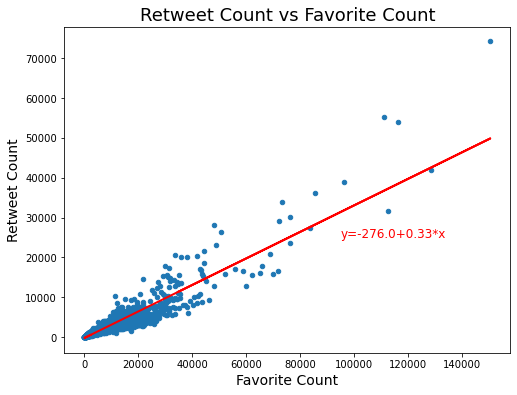

In [144]:
df_retweet.plot(x='favorite_count', y='retweet_count', kind='scatter', figsize=(8,6))
plt.plot(np.array(x), fit[0] * np.array(x) + fit[1], color='red', linewidth=2)
plt.text(95000, 25000, 'y={:.1f}+{:.2f}*x'.format(fit[1], fit[0]), color='red', size=12)
plt.xlabel('Favorite Count', fontsize=14)
plt.ylabel('Retweet Count', fontsize=14)
plt.title('Retweet Count vs Favorite Count', fontsize=18);

# Reference: https://towardsdatascience.com/simple-and-multiple-linear-regression-with-python-c9ab422ec29c

### Favorite Count vs Rating

"We Rate Dogs" provides ratings as a ratio with a non-negative numerator and a denominator that is often 10 or some multiple of 10 -- for example "13/10".  When the denominator is some multiple of 10, it is almost always because more than one dog is involved in the picture(s).  For what follows, we will exclude cases with multiple dogs as best we can by only looking at ratings where the denominator is 10.  (This technique is not a perfect filter for just posts about a single dog since sometimes a rating might be give as "12/10 for each one".  But at least in that case the rating is clearly meant to apply to each individual rather than to the group in aggregate.)  By selecting posts only where the denominator is 10, we can summarize the rating easily by simply looking at the rating numerator alone, which we will do.

In [145]:
(df_archive0.rating_denominator == 10).sum(), (df_master.rating_denominator == 10).sum()

(2094, 2094)

In [146]:
# Set up a DataFrame for the analysis
mask_denom10 = df_master.rating_denominator == 10
df_favrat = df_master[mask_denom10][['favorite_count','rating_numerator']].copy()
df_favrat = df_favrat.dropna()
df_favrat.head()

,favorite_count,rating_numerator
tweet_id,,
666020888022790149,2344,8.0
666029285002620928,117,7.0
666033412701032449,107,9.0
666044226329800704,259,6.0
666049248165822465,93,5.0


In [147]:
df_favrat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 666020888022790149 to 892420643555336193
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   favorite_count    2087 non-null   Int64  
 1   rating_numerator  2087 non-null   Float64
dtypes: Float64(1), Int64(1)
memory usage: 53.0+ KB


In [148]:
df_favrat.describe()

,favorite_count,rating_numerator
count,2087.000000,2087.000000
mean,8034.851461,10.611778
std,11706.983395,2.163877
min,69.000000,0.000000
25%,1770.500000,10.000000
50%,3651.000000,11.000000
75%,10072.000000,12.000000
max,150433.000000,14.000000


The mean rating is 10.6 and the median is 11.  The bulk of the ratings, the three upper quartiles, are greater than or equal to 10.  This is also evident in the histogram below which shows a left-skewed distribution.

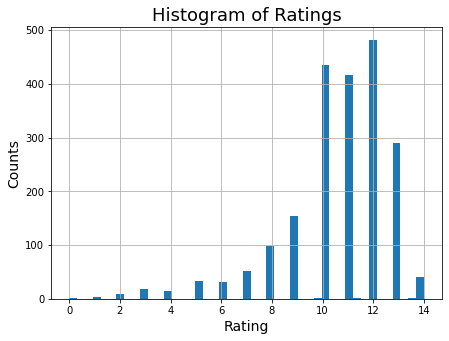

In [149]:
df_favrat.rating_numerator.hist(bins='auto', figsize=(7,5))

plt.xlabel('Rating', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Histogram of Ratings', fontsize=18);

We can plot `favorite_count` versus `rating_numerator` to see whether there is any apparent relationship.  Below we see that higher favorite counts are associated with higher ratings.

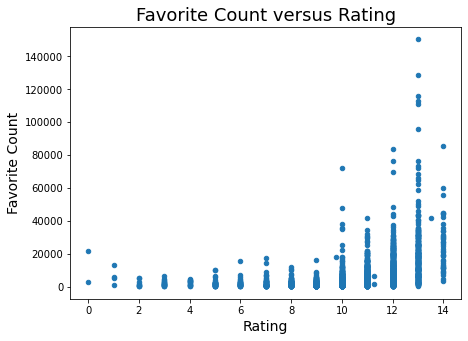

In [150]:
df_favrat.plot(x='rating_numerator', y='favorite_count', kind='scatter', figsize=(7,5))

plt.xlabel('Rating', fontsize=14)
plt.ylabel('Favorite Count', fontsize=14)
plt.title('Favorite Count versus Rating', fontsize=18);

We see that the value of 10 bifurcates the ratings into two groups: less than 10 and greater than or equal to 10.  We saw previously that the number of ratings increases substantially at 10.  Plus, we see here that higher frequency counts only occur for ratings greater than or equal to 10.  So, in examining favorite count versus rating further, we will divide the data according to this natural bifurcation.

In [151]:
# Create DataFrame for lower portion of the bifurcation (rating < 10)
df_favrat_low = df_favrat[df_favrat.rating_numerator < 10]
df_favrat_low.head()

,favorite_count,rating_numerator
tweet_id,,
666020888022790149,2344,8.0
666029285002620928,117,7.0
666033412701032449,107,9.0
666044226329800704,259,6.0
666049248165822465,93,5.0


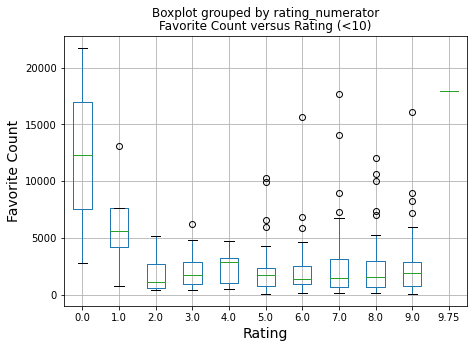

In [152]:
df_favrat_low.boxplot(by='rating_numerator', figsize=(7,5))

plt.xlabel('Rating', fontsize=14)
plt.ylabel('Favorite Count', fontsize=14)
plt.title('Favorite Count versus Rating (<10)', fontsize=12);

In [153]:
# Show the value counts per rating, sorted by the rating value
df_favrat_low.rating_numerator.value_counts().sort_index()

0.00      2
1.00      4
2.00      9
3.00     19
4.00     15
5.00     33
6.00     32
7.00     51
8.00     98
9.00    154
9.75      1
Name: rating_numerator, dtype: Int64

In [154]:
# Create DataFrame for higher portion of the bifurcation (rating >= 10)
df_favrat_high = df_favrat[df_favrat.rating_numerator >= 10]
df_favrat_high.head()

,favorite_count,rating_numerator
tweet_id,,
666050758794694657,119,10.0
666055525042405380,394,10.0
666063827256086533,431,10.0
666073100786774016,280,10.0
666102155909144576,69,11.0


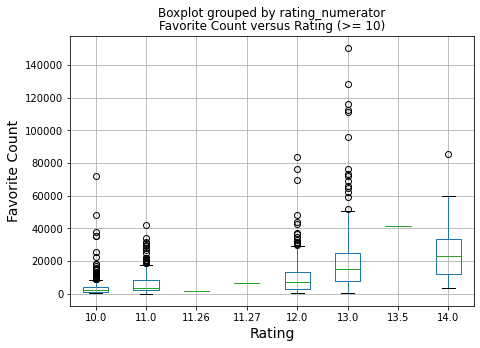

In [155]:
df_favrat_high.boxplot(by='rating_numerator', figsize=(7,5))

plt.xlabel('Rating', fontsize=14)
plt.ylabel('Favorite Count', fontsize=14)
plt.title('Favorite Count versus Rating (>= 10)', fontsize=12);

Nearly all of the favorite counts for the low ratings (< 10) we saw were less than 20000 and most of them were less than 5000.  That range of counts only rises to the first gradation above 0 on this plot for the high ratings (>= 10).  The high ratings see a much higher range of favorite counts than the low ratings.

In [156]:
# Show the value counts per rating, sorted by the rating value
df_favrat_high.rating_numerator.value_counts().sort_index()

10.00    435
11.00    417
11.26      1
11.27      1
12.00    482
13.00    291
13.50      1
14.00     41
Name: rating_numerator, dtype: Int64

### Ratings as Dog Predictors

It was observed informally that low ratings sometimes indicate that a picture does not contain a dog but rather a different kind of animal (like a hedge hog, for example).  We will investigate using ratings as an indicator for whether the post concerns a dog.  The question we would like to investigate here is, "Does 'We Rate Dogs' use low ratings to indicate that the post is not about a dog?"  Or more precisely, "How strong of an indicator is the rating for the presence of a dog in the post?"  To do this, we would need to know which posts concern a dog and which do not.  Apart from recording that information for each post by means of human observation (a tedious task), we will use the machine learning (ML) predictions data provided to us as a benchmark for whether a post concerns a dog.  This is an imperfect benchmark, since the prediction data itself should be tested for reliability.  So, the more accurate way of looking at this investigation is as a comparison of using the ratings as dog predictors with the machine learning prediction data provided.  The ML prediction data provides three ranked predictions -- first, second, and third in confidence.  We will compare the ratings as dog predictors with (1) the top ranked predictions of the ML algorithm as well as with (2) the conjunction of the ranked predictions.  The latter case is a conservative prediction and will only predict a dog when all three ranked predictions say there is a dog (i.e., the conjunction of the predictions); otherwise, the default will be that there is not a dog.

In [157]:
#Create DataFrame and clean for analysis

df_predplus = df_master[['rating_numerator', 'rating_denominator', 'p1_dog', 'p2_dog', 'p3_dog']].copy()
df_predplus = df_predplus[df_predplus.rating_denominator == 10].dropna()
df_predplus.rating_numerator = df_predplus.rating_numerator.astype(float)  # Needed for statsmodels.api
df_predplus.rating_denominator = df_predplus.rating_denominator.astype(int)
# Make predictions 1/0 instead of True/False for logistic regression
df_predplus.p1_dog = df_predplus.p1_dog.astype(int)
df_predplus.p2_dog = df_predplus.p2_dog.astype(int)
df_predplus.p3_dog = df_predplus.p3_dog.astype(int)
# Add the conjunction of dog predictions (p123_dog)
df_predplus['p123_dog'] = df_predplus.p1_dog * df_predplus.p2_dog * df_predplus.p3_dog
# Put in the intercept for the upcoming logistic regression
df_predplus['intercept'] = 1    

df_predplus.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1973 entries, 666020888022790149 to 892420643555336193
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rating_numerator    1973 non-null   float64
 1   rating_denominator  1973 non-null   int64  
 2   p1_dog              1973 non-null   int64  
 3   p2_dog              1973 non-null   int64  
 4   p3_dog              1973 non-null   int64  
 5   p123_dog            1973 non-null   int64  
 6   intercept           1973 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 123.3+ KB


In [158]:
df_predplus.head()

,rating_numerator,rating_denominator,p1_dog,p2_dog,p3_dog,p123_dog,intercept
tweet_id,,,,,,,
666020888022790149,8.0,10,1,1,1,1,1
666029285002620928,7.0,10,1,1,1,1,1
666033412701032449,9.0,10,1,1,1,1,1
666044226329800704,6.0,10,1,1,1,1,1
666049248165822465,5.0,10,1,1,1,1,1


In [159]:
print('From {} posts with predictions.'.format(len(df_predplus)))
print('The ML algorithm\'s top ranked prediction yielded {} dogs.'.format(df_predplus.p1_dog.sum()))
print('The conjunction of ranked predictions yielded {} dogs.'.format(df_predplus.p123_dog.sum())) 

From 1973 posts with predictions.
The ML algorithm's top ranked prediction yielded 1461 dogs.
The conjunction of ranked predictions yielded 1189 dogs.


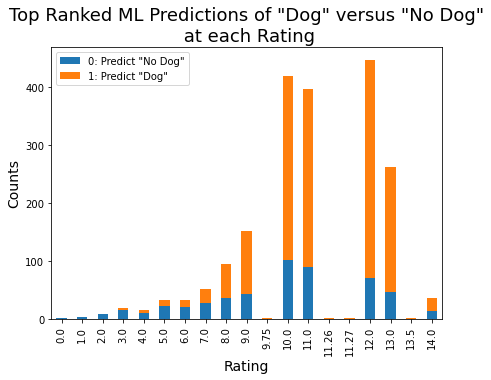

In [160]:
data = pd.DataFrame(df_predplus[['rating_numerator', 'p1_dog']].value_counts().sort_index())
data.rename(columns={0: 'count'})
data.unstack().plot(kind='bar', stacked=True, figsize=(7,5))

plt.xlabel('Rating', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Top Ranked ML Predictions of "Dog" versus "No Dog"\n at each Rating', fontsize=18)
plt.legend(labels=['0: Predict "No Dog"', '1: Predict "Dog"']);

# Reference: https://stackoverflow.com/questions/29525120/pandas-creating-a-histogram-from-string-counts
# Reference: https://stackoverflow.com/questions/34248741/plotting-pandas-multiindex-bar-chart

In the plot, the proportion of orange to blue per bar increases roughly as the ratings increase.  This means that the proportion of ML predictions of "Dog" to "No Dog" increases roughly as the ratings increase.  (Or, from the opposite perspective, lower ratings are stronger indicators of "No Dog".)  This increase is particularly strong for ratings less than 10 and is less so (it appears to roughly flatten out) for ratings greater than or equal to 10.  

This relationship suggests that the dog ratings themselves can be viewed somewhat as predictors of "Dog" versus "No Dog".  We will examine this using logistic regression over a few cases:

1) Rating as a predictor of Top Ranked ML Dog Predictions    
2) Rating as a predictor of the Conjunction of ML Dog Predictions    
3) Rating as predictor of Top Ranked ML Dog Predictions for low ratings (< 10)    
4) Rating as predictor of Top Ranked ML Dog Predictions for high ratings (>= 10)    

In [161]:
#### Logistic Regression: Rating as predictor of Top Ranked ML Dog Predictions

model = sm.Logit(df_predplus['p1_dog'], df_predplus[['intercept', 'rating_numerator']] )   # Instantiate the model
result = model.fit()       # Fit the model
result.summary()

Optimization terminated successfully.
         Current function value: 0.532925
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 p1_dog   No. Observations:                 1973
Model:                          Logit   Df Residuals:                     1971
Method:                           MLE   Df Model:                            1
Date:                Fri, 12 Mar 2021   Pseudo R-squ.:                 0.06919
Time:                        14:30:51   Log-Likelihood:                -1051.5
converged:                       True   LL-Null:                       -1129.6
Covariance Type:            nonrobust   LLR p-value:                 7.252e-36
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept           -1.9336      0.255     -7.594      0.000      -2.433      -1.435
rating_numerator     0.2894      0.024     11.814      0.000       0.241       0.337
====================================================================================
"""

In [162]:
result.params

intercept          -1.933619
rating_numerator    0.289381
dtype: float64

In [163]:
np.exp(result.params)

intercept           0.144624
rating_numerator    1.335600
dtype: float64

**Interpretation**    
The resulting logistic model is:   
$log_e \Big( \frac{p_i}{1 - p_i} \Big) = -1.933 + 0.289\times \text{rating}$.  

Where $ \frac{p_i}{1 - p_i} $ is the odds of the ML algorithm predicting a "Dog" given a particular $\text{rating}$, the odds ratio is   
$\text{Odds Ratio} = \frac{\text{Odds given rating = x + 1}}{\text{Odds given rating = x}}$.   
It can be shown that   
$\text{Odds Ratio} = exp(\text{coeff. of rating})$     
so that in this case the odds ratio is $exp(0.289) = 1.34$ which indicates that we expect a multiplicative change of 1.34 in the odds for an increase in rating by 1.  In other words, the model predicts a 34% increase in the odds of the ML algorithm predicting a "Dog" for each increase in rating by 1.

#### Logistic Regression: Rating as predictor of the Conjunction of ML Dog Predictions

In [164]:
model = sm.Logit(df_predplus['p123_dog'], df_predplus[['intercept', 'rating_numerator']] )   # Instantiate the model
result = model.fit()       # Fit the model
result.summary()

Optimization terminated successfully.
         Current function value: 0.646417
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               p123_dog   No. Observations:                 1973
Model:                          Logit   Df Residuals:                     1971
Method:                           MLE   Df Model:                            1
Date:                Fri, 12 Mar 2021   Pseudo R-squ.:                 0.03797
Time:                        14:30:51   Log-Likelihood:                -1275.4
converged:                       True   LL-Null:                       -1325.7
Covariance Type:            nonrobust   LLR p-value:                 1.086e-23
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept           -1.8763      0.245     -7.652      0.000      -2.357      -1.396
rating_numerator     0.2183      0.023      9.530      0.000       0.173       0.263
====================================================================================
"""

In [165]:
result.params

intercept          -1.876271
rating_numerator    0.218282
dtype: float64

In [166]:
np.exp(result.params)

intercept           0.153160
rating_numerator    1.243937
dtype: float64

**Interpretation**    
The resulting logistic model is:   
$log_e \Big( \frac{p_i}{1 - p_i} \Big) = -1.876 + 0.218\times \text{rating}$.  

Where $ \frac{p_i}{1 - p_i} $ is the odds of the ML algorithm predicting a "Dog" given a particular $\text{rating}$, the odds ratio is   
$\text{Odds Ratio} = \frac{\text{Odds given rating = x + 1}}{\text{Odds given rating = x}}$.   
It can be shown that   
$\text{Odds Ratio} = exp(\text{coeff. of rating})$     
so that in this case the odds ratio is $exp(0.218) = 1.24$ which indicates that we expect a multiplicative change of 1.24 in the odds for an increase in rating by 1.  In other words, the model predicts a 24% increase in the odds of the ML algorithm predicting a "Dog" for each increase in rating by 1.

The odds ratio for the Top Ranked ML Prediction was 1.34 and, in this case, the odds ratio for the Conjunction of ML Predictions was 1.24.  So, whichever ML prediction technique we use, the "We Rate Dogs" rating itself seems to track with the ML algorithm in a loose way.

Next we look at how the ratings compare when partitioned into low (< 10) and high (>= 10).  We expect that the ratings will be a stronger indicator over the low partition than the high.

#### Logistic Regression: Rating as predictor of Top Ranked ML Dog Predictions for low ratings (< 10)

In [167]:
df_predplus_low = df_predplus[df_predplus.rating_numerator < 10].copy()
df_predplus_low.shape

(411, 7)

In [168]:
print(df_predplus_low.p1_dog.sum(), len(df_predplus_low) - df_predplus_low.p1_dog.sum() )
df_predplus_low.p1_dog.mean()

220 191


0.5352798053527981

In [169]:
df_predplus_low[['rating_numerator', 'p1_dog']].value_counts().sort_index()

rating_numerator  p1_dog
0.00              0           2
1.00              0           4
2.00              0           8
                  1           1
3.00              0          16
                  1           3
4.00              0          11
                  1           4
5.00              0          23
                  1           9
6.00              0          20
                  1          12
7.00              0          27
                  1          24
8.00              0          37
                  1          58
9.00              0          43
                  1         108
9.75              1           1
dtype: int64

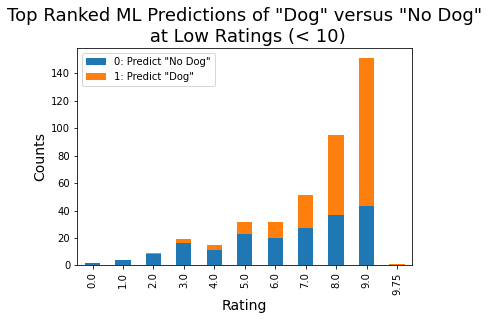

In [170]:
data = pd.DataFrame(df_predplus_low[['rating_numerator', 'p1_dog']].value_counts().sort_index())
data.rename(columns={0: 'count'})
data.unstack().plot(kind='bar', stacked=True)

plt.xlabel('Rating', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Top Ranked ML Predictions of "Dog" versus "No Dog"\n at Low Ratings (< 10)', fontsize=18)
plt.legend(labels=['0: Predict "No Dog"', '1: Predict "Dog"']);

In [171]:
model = sm.Logit(df_predplus_low['p1_dog'], df_predplus_low[['intercept', 'rating_numerator']] )   # Instantiate the model
result = model.fit()       # Fit the model
result.summary()

Optimization terminated successfully.
         Current function value: 0.608730
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 p1_dog   No. Observations:                  411
Model:                          Logit   Df Residuals:                      409
Method:                           MLE   Df Model:                            1
Date:                Fri, 12 Mar 2021   Pseudo R-squ.:                  0.1186
Time:                        14:30:51   Log-Likelihood:                -250.19
converged:                       True   LL-Null:                       -283.86
Covariance Type:            nonrobust   LLR p-value:                 2.282e-16
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept           -3.1668      0.484     -6.538      0.000      -4.116      -2.217
rating_numerator     0.4517      0.063      7.162      0.000       0.328       0.575
====================================================================================
"""

In [172]:
result.params

intercept          -3.166793
rating_numerator    0.451743
dtype: float64

In [173]:
np.exp(result.params)

intercept           0.042139
rating_numerator    1.571049
dtype: float64

**Interpretation**    
The resulting logistic model is:   
$log_e \Big( \frac{p_i}{1 - p_i} \Big) = -3.167 + 0.452\times \text{rating}$.  

Where $ \frac{p_i}{1 - p_i} $ is the odds of the ML algorithm predicting a "Dog" given a particular $\text{rating}$, the odds ratio is   
$\text{Odds Ratio} = \frac{\text{Odds given rating = x + 1}}{\text{Odds given rating = x}}$.   
It can be shown that   
$\text{Odds Ratio} = exp(\text{coeff. of rating})$     
so that in this case the odds ratio is $exp(0.452) = 1.57$ which indicates that we expect a multiplicative change of 1.57 in the odds for an increase in rating by 1.  In other words, the model predicts a 57% increase in the odds of the ML algorithm predicting a "Dog" for each increase in rating by 1.

#### Logistic Regression: Rating as predictor of Top Ranked ML Dog Predictions for high ratings (>= 10)

In [174]:
df_predplus_high = df_predplus[df_predplus.rating_numerator >= 10].copy()
df_predplus_high.shape

(1562, 7)

In [175]:
print(df_predplus_high.p1_dog.sum(), len(df_predplus_high) - df_predplus_high.p1_dog.sum() )
df_predplus_high.p1_dog.mean()

1241 321


0.79449423815621

In [176]:
df_predplus_high[['rating_numerator', 'p1_dog']].value_counts().sort_index()

rating_numerator  p1_dog
10.00             0         101
                  1         318
11.00             0          89
                  1         307
11.26             1           1
11.27             1           1
12.00             0          70
                  1         376
13.00             0          47
                  1         215
13.50             1           1
14.00             0          14
                  1          22
dtype: int64

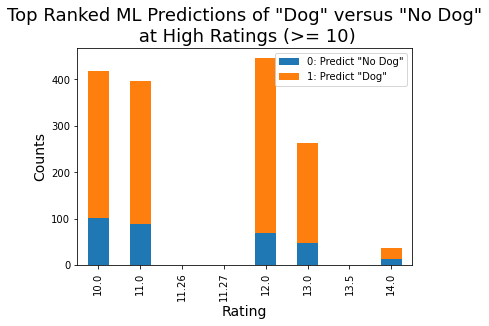

In [177]:
data = pd.DataFrame(df_predplus_high[['rating_numerator', 'p1_dog']].value_counts().sort_index())
data.rename(columns={0: 'count'})
data.unstack().plot(kind='bar', stacked=True)

plt.xlabel('Rating', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Top Ranked ML Predictions of "Dog" versus "No Dog"\n at High Ratings (>= 10)', fontsize=18)
plt.legend(labels=['0: Predict "No Dog"', '1: Predict "Dog"']);

In [178]:
model = sm.Logit(df_predplus_high['p1_dog'], df_predplus_high[['intercept', 'rating_numerator']] )   # Instantiate the model
result = model.fit()       # Fit the model
result.summary()

Optimization terminated successfully.
         Current function value: 0.506972
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 p1_dog   No. Observations:                 1562
Model:                          Logit   Df Residuals:                     1560
Method:                           MLE   Df Model:                            1
Date:                Fri, 12 Mar 2021   Pseudo R-squ.:                0.001907
Time:                        14:30:51   Log-Likelihood:                -791.89
converged:                       True   LL-Null:                       -793.40
Covariance Type:            nonrobust   LLR p-value:                   0.08193
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept            0.2386      0.644      0.371      0.711      -1.023       1.500
rating_numerator     0.0978      0.056      1.733      0.083      -0.013       0.208
====================================================================================
"""

In [179]:
result.params

intercept           0.238590
rating_numerator    0.097793
dtype: float64

In [180]:
np.exp(result.params)

intercept           1.269457
rating_numerator    1.102735
dtype: float64

**Interpretation**    
The resulting logistic model is:   
$log_e \Big( \frac{p_i}{1 - p_i} \Big) = 0.239 + 0.0978\times \text{rating}$.  

Where $ \frac{p_i}{1 - p_i} $ is the odds of the ML algorithm predicting a "Dog" given a particular $\text{rating}$, the odds ratio is   
$\text{Odds Ratio} = \frac{\text{Odds given rating = x + 1}}{\text{Odds given rating = x}}$.   
It can be shown that   
$\text{Odds Ratio} = exp(\text{coeff. of rating})$     
so that in this case the odds ratio is $exp(0.0978) = 1.10$ which indicates that we expect a multiplicative change of 1.10 in the odds for an increase in rating by 1.  In other words, the model predicts a 10% increase in the odds of the ML algorithm predicting a "Dog" for each increase in rating by 1.

So, when comparing the use of rating as a predictor of the ML algorithm's top ranked prediction providing a verdict of "Dog", the lower ratings yield an odds ratio of 1.57 as compared to an odds ratio of 1.10 for the upper ratings.  At the lower ratings, differences in the ratings yield more information about whether there is a dog or not as the subject of the post (taking the ML algorithm's predictions as a baseline).